In [1]:
# 读取数据
import pandas as pd

# 读取 Excel 
df = pd.read_excel("20250820q数据删除缺失95%以上的.xlsx", sheet_name="Sheet1")
# 每列缺失值比例
missing_ratio = df.isna().mean()  # 结果是 0~1 的比例

# 转成百分比
missing_ratio_percent = (df.isna().mean() * 100).round(2)

# 合并成一个 DataFrame，方便查看
missing_df = pd.DataFrame({
    '缺失数量': df.isna().sum(),
    '缺失比例(%)': missing_ratio_percent
})

missing_df

,缺失数量,缺失比例(%)
序号,0,0.00
ID,3,0.12
患者姓名,0,0.00
标签,2202,85.68
注册时间,0,0.00
...,...,...
颜色(COLOR),1657,64.47
颜色(Color),2211,86.03
颜色(color),2429,94.51
高密度脂蛋白胆固醇[HDL-C],1584,61.63


In [282]:
CDD1=df.copy()

In [198]:
df = CDD1.copy()

In [34]:
# 标签分组
blood_vars=[['平均红细胞体积(MCV)',
 '酸碱度(PH)',
 '单核细胞绝对值[MONO#]',
 '淋巴细胞百分率[LYM%]',
 '嗜酸粒细胞绝对值[EO#]',
 '单核细胞百分率[MONO%]',
 '嗜碱粒细胞绝对值[BASO#]',
 '比重(SG)',
 '尿肌酐',
 '红细胞压积(HCT)',
 '促甲状腺素[TSH]',
 '尿白蛋白/尿肌酐',
 '钠[Na]',
 '肌酐[Cr]',
 '血小板容积(PCT)',
 '红细胞[RBC]',
 '纤维蛋白原[Fib]',
 '中性粒细胞绝对值[NEU#]',
 '血小板计数[PLT]',
 '嗜碱粒细胞百分率[BASO%]',
 '氯[Cl]',
 'D-二聚体[D-D]',
 '淋巴细胞绝对值[LYM#]',
 '嗜酸粒细胞百分率[EOS%]',
 'N末端前脑钠肽[NT-proBNP]',
 '尿酸[UA]',
 '直接胆红素[DBIL]',
 '胱抑素C[Cys-C]',
 '血小板分布宽度(PDW)',
 'PT国际标准化比值[INR]',
 '脂蛋白a[Lpa]',
 '总胆红素[TBIL]',
 '平均血小板体积[MPV]',
 '葡萄糖(空腹)[GLU]',
 'RBC分布宽度SD(RDW-SD)',
 '白细胞[WBC]',
 '平均血红蛋白浓度(MCHC)',
 '载脂蛋白A1[ApoA1]',
 '无机磷[P]',
 '心型肌酸激酶[CKMB]',
 '球蛋白[GLB]',
 '高密度脂蛋白胆固醇[HDL-C]',
 '低密度脂蛋白胆固醇[LDL-C]',
 '肌酸激酶[CK]',
 '丙氨酸氨基转移酶[ALT]',
 'C-反应蛋白[CRP]',
 '中性粒细胞百分率[NEU%]',
 '白球蛋白比值[A/G]',
 '尿素[UREA]',
 '钾[K]',
 '尿微量白蛋白',
 '白蛋白[ALB]',
 '超敏C反应蛋白[hs-CRP]',
 '天门冬氨酸氨基转移酶[AST]',
 '碱性磷酸酶[ALP]',
 '载脂蛋白B[ApoB]',
 '总甲状腺素[TT4]',
 '总蛋白[TP]',
 '总胆固醇[CHO]',
 '乳酸脱氢酶[LDH]',
 '游离三碘甲状腺原氨酸[FT3]',
 '血红蛋白(HGB)',
 '钙[Ca]',
 '活化部分凝血活酶时间[APTT]',
 '镁[Mg]',
 '凝血酶原时间[PT]',
 'RBC分布宽度CV(RDW-CV)',
 '糖化血红蛋白A1c[HbA1c]',
 '血清淀粉样蛋白A',
 '总三碘甲状腺原氨酸[TT3]',
 '游离甲状腺素[FT4]',
 '高敏肌钙蛋白I[hs TnI]',
 '间接胆红素[IBIL]',
 'α-羟丁酸脱氢酶[HBDH]',
 '平均血红蛋白含量(MCH)',
 '甘油三脂[TG]']]

cpet_vars=['卧位心室率',
       '峰值心率', '峰值功率', '峰值氧脉', 'VE/VCO2斜率.1', '静息血压-收缩压', '静息血压-舒张压', 'FVC',
       'VCmax', 'FEV1', 'FEV1/FVC', 'MVV', '运动中最高收缩压', '运动终止后3分钟收缩压',
       '运动中最高舒张压', '运动终止后3分钟舒张压', '运动终止后1分钟心率', '运动终止后2分钟心率', '运动终止后3分钟心率',
       '峰值氧耗', '峰值公斤氧耗', '峰值分钟通气量', '呼吸商', '每分钟通气量(毫升)', 'load-maxload',
       'VO2-AT', 'VCO2-AT', 'VCO2-Max.Load', 'VCO2/kg-AT', 'VCO2/kg-Max.Load',
       'HR-AT', 'HR-Max.Load', 'BPsys-AT', 'BPsys-Max.Load', 'BPdia_AT',
       'BPdia-Max.Load', 'VE-AT', 'VT-AT', 'f-ergo-AT', 'BR-AT',
       'EQO2-Max.Load', 'EQCO2-Max.Load', 'PETO2-AT', 'PETO2-Max.Load',
       'PETCO2-AT', 'PETCO2-Max.Load', 'MAX BP*HR', 'Threshold Power']

TARGET=['Age']

basic_vars=['Sex', 'Weight', 'Height']

In [269]:
# 显示工具 全显示
import pandas as pd

# 显示所有列
pd.set_option('display.max_columns', None)

# 显示所有行
pd.set_option('display.max_rows', None)

# 设置每列内容的最大显示宽度，避免内容被截断
pd.set_option('display.max_colwidth', None)

# 设置显示宽度，避免换行
pd.set_option('display.width', None)

In [255]:
# 显示工具 部分显示
# 恢复显示列数为默认
pd.reset_option("display.max_columns")

# 恢复显示行数为默认
pd.reset_option("display.max_rows")

# 恢复最大列宽为默认
pd.reset_option("display.max_colwidth")

# 恢复总显示宽度为默认
pd.reset_option("display.width")


In [ ]:
# 手动清洗数据
# 将所有0值、非数值标记为缺失，统一转换为数值型
import pandas as pd
import numpy as np

# 删除重复列，计算BMI
df = df.drop_duplicates(subset=['手机'], keep='first')
df=df[cpet_vars+TARGET+basic_vars]
df['BMI'] = df['Weight']/((df['Height']/100)**2)

basic_vars=['Sex', 'Weight', 'Height', 'BMI']

# 定义转换函数
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # 如果是一个可迭代的结果（比如 Series），那就取第一个值
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# 统计每列转换失败的数量
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # 跳过 'Sex' 列
        continue
    try:
        original_count = df[col].notna().sum()  # 确保是数字
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # 显式转换为整数
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"处理列 '{col}' 时出错：{e}")

# 输出结果
if failed_counts:
    print("转换失败的列及其数量：")
    for col, count in failed_counts.items():
        print(f"列 '{col}': {count} 个值转换失败")
else:
    print("所有列均成功转换，无失败值。")

# 删除缺失比例80%以上的列，删除所有 Age 为缺失的行
import pandas as pd

# 假设 df 是你的数据集

# 计算每一列的缺失值比例
missing_values_ratio = df.isnull().mean()

# 找出缺失值比例大于80%的列
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# 删除这些列
df = df.drop(columns=columns_to_drop)

# 打印删除的列名
print("删除的列名：")
print(columns_to_drop)
# 删除所有 Age 为缺失的行
initial_row_count = df.shape[0]
df = df.dropna(subset=['Age'])
rows_dropped = initial_row_count - df.shape[0]

# 打印删除的行数
print(f"删除的行数：{rows_dropped}")
# 性别转换
df['Sex'] = df['Sex'].map({'男': 1, '女': 0})
df = df.apply(pd.to_numeric, errors='coerce')
# 手动处理异常格式数据
# 将所有0值、非数值标记为缺失，统一转换为数值型
import pandas as pd
import numpy as np

# 示例数据（你可以用自己的 df = pd.read_csv(...) 替换）
# df = pd.read_csv('你的文件路径.csv')

# 定义转换函数
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # 如果是一个可迭代的结果（比如 Series），那就取第一个值
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# 统计每列转换失败的数量
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # 跳过 'Sex' 列
        continue
    try:
        original_count = df[col].notna().sum()  # 确保是数字
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # 显式转换为整数
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"处理列 '{col}' 时出错：{e}")

# 输出结果
if failed_counts:
    print("转换失败的列及其数量：")
    for col, count in failed_counts.items():
        print(f"列 '{col}': {count} 个值转换失败")
else:
    print("所有列均成功转换，无失败值。")

# 删除缺失比例80%以上的列，删除所有 Age 为缺失的行
import pandas as pd

# 假设 df 是你的数据集

# 计算每一列的缺失值比例
missing_values_ratio = df.isnull().mean()

# 找出缺失值比例大于80%的列
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# 删除这些列
df = df.drop(columns=columns_to_drop)

# 打印删除的列名
print("删除的列名：")
print(columns_to_drop)
# 删除所有 Age 为缺失的行
initial_row_count = df.shape[0]
df = df.dropna(subset=['Age'])
rows_dropped = initial_row_count - df.shape[0]

# 打印删除的行数
print(f"删除的行数：{rows_dropped}")
df = df.apply(pd.to_numeric, errors='coerce')

# 删除 Age 缺失 或 小于10 的行
df = df[~df['Age'].isna() & (df['Age'] >= 10)]

# 删除 Sex 缺失的行
df = df[~df['Sex'].isna()]

# 处理极端值
# —— 放在准备好 X_all 之后，split 之前 ——
def clean_physio_outliers(X: pd.DataFrame) -> pd.DataFrame:
    X = X.copy()
    rules = {
        # 血压（mmHg）
        "BPdia-Max.Load": (30, 150),     # 舒张压不可能到几百，更不可能到上千
        "BPsys-Max.Load": (80, 300),
        "静息血压-舒张压":   (30, 150),
        "静息血压-收缩压":   (70, 250),

        # 心率（次/分）
        "HR-Max.Load":      (40, 220),
        "运动终止后1分钟心率": (30, 220),
        "运动终止后2分钟心率": (30, 220),
        "运动终止后3分钟心率": (30, 220),

        # 气体/通气相关（给出宽松合理边界）
        "VE/VCO2斜率.1": (10, 80),
        "呼吸商":        (0.6, 2.0),
        "峰值分钟通气量":   (5, 250),    # L/min 粗边界
        "峰值氧耗":       (0.1, 4.0),   # L/min 粗边界
        "峰值公斤氧耗":    (3, 80),     # ml/kg/min 粗边界
    }
    for col, (lo, hi) in rules.items():
        if col in X.columns:
            bad = (X[col] < lo) | (X[col] > hi)
            X.loc[bad, col] = np.nan
    return X

# 使用：
df = clean_physio_outliers(df)

print(df.shape)
df.tail()

In [ ]:
# 1.回归建模 ===============================================================
# 高效·零泄漏 CPET 回归建模全流程（基模型 + OOF + 仅OOF选型 + 堆叠 + 导出）
# 依赖：scikit-learn, numpy, pandas（可选：xgboost, lightgbm）
# 作者：GPT 5
# ===============================================================

import os, time, json, warnings
from datetime import datetime
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import clone
from sklearn.ensemble import StackingRegressor

In [ ]:
# ---------------- 全局配置（提速&复现） ----------------
RANDOM_STATE   = 42
FAST_MODE      = True          # True 强力提速（减少折数/搜索迭代/关闭慢模型）
TEST_SIZE      = 0.2           # holdout 比例：仅做最终一次评估
OUT_DIR        = "runs_fast_clean"  # 总输出目录（下按时间分版本）
os.makedirs(OUT_DIR, exist_ok=True)
warnings.filterwarnings("ignore")
np.set_printoptions(precision=4, suppress=True)

# 版本化 run 目录，避免文件互相覆盖
RUN_ID  = datetime.now().strftime("%Y%m%d-%H%M%S")
RUN_DIR = os.path.join(OUT_DIR, RUN_ID)
BP_RUN  = os.path.join(RUN_DIR, "best_params")          # 本次 run 的超参
BP_LATEST = os.path.join(OUT_DIR, "best_params_latest") # “最新稳定”别名
os.makedirs(RUN_DIR, exist_ok=True)
os.makedirs(BP_RUN, exist_ok=True)
os.makedirs(BP_LATEST, exist_ok=True)

def p_best(model_name):   # 本次 run 文件
    return os.path.join(BP_RUN, f"{model_name}.json")
def p_latest(model_name): # 最新别名
    return os.path.join(BP_LATEST, f"{model_name}.json")

with open(os.path.join(OUT_DIR, "latest_run.txt"), "w", encoding="utf-8") as f:
    f.write(RUN_DIR)

def log(msg: str):
    print(f"[{time.strftime('%H:%M:%S')}] {msg}", flush=True)

# ---------------- 基础工具：安全 JSON 持久化 ----------------
def _sanitize_for_json(obj):
    import numpy as _np
    if isinstance(obj, dict):
        return {k: _sanitize_for_json(v) for k, v in obj.items()}
    if isinstance(obj, (list, tuple)):
        return [ _sanitize_for_json(v) for v in obj ]
    if isinstance(obj, (_np.integer,)):
        return int(obj)
    if isinstance(obj, (_np.floating,)):
        return float(obj)
    if isinstance(obj, (_np.bool_,)):
        return bool(obj)
    return obj

def dump_json_atomic(obj, path: str):
    obj = _sanitize_for_json(obj)
    tmp = path + ".tmp"
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(tmp, "w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)
        f.flush(); os.fsync(f.fileno())
    os.replace(tmp, path)

def save_best_and_update_latest(model_name, best_params: dict):
    # 写入本次 run
    dump_json_atomic(best_params, p_best(model_name))
    # 更新最新别名
    dump_json_atomic(best_params, p_latest(model_name))

In [ ]:
# 0) 数据准备
# ===============================================================
# 示例：
# df, basic_vars, cpet_vars, blood_vars = ...
USE_BLOOD = False

feature_cols = basic_vars + cpet_vars + (blood_vars if USE_BLOOD else [])
X_all = df[feature_cols].apply(pd.to_numeric, errors="coerce").astype(np.float32).copy()
y_all = df["Age"].astype(np.float32).copy()

# Sex 映射
if X_all["Sex"].dtype == object:
    X_all["Sex"] = X_all["Sex"].map({"M":1,"F":0,"男":1,"女":0}).astype(np.float32)

def make_strata(y: pd.Series, sex: pd.Series) -> pd.Series:
    bins = pd.cut(y, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
    return sex.astype(int).astype(str) + "_" + bins.astype(str)

strata_all = make_strata(y_all, X_all["Sex"])
X_tr_raw, X_va_raw, y_tr, y_va, strata_tr_all, strata_va = train_test_split(
    X_all, y_all, strata_all, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=strata_all
)

# 护栏：训练流程里任何函数都不应使用 holdout
def assert_no_holdout_in(obj):
    if isinstance(obj, (pd.DataFrame, pd.Series)):
        if obj.index.equals(X_va_raw.index):
            raise RuntimeError("❌ Holdout data detected in training flow!")

# ===============================================================

In [122]:
# 1) 特征筛选（仅用训练集信息）：去常量 + 高相关去冗余
# ===============================================================
CORR_THRES = 0.90
IMPUTE_STRATEGY = "median"

def drop_constant_and_highcorr(X_train: pd.DataFrame, X_valid: pd.DataFrame,
                               corr_thres: float = CORR_THRES):
    meta = {"CORR_THRES": corr_thres, "dropped_constant": [], "dropped_corr": [], "kept_columns": []}
    vt = VarianceThreshold(0.0); vt.fit(X_train)
    cols_v = X_train.columns[vt.get_support()].tolist()
    dropped_const = [c for c in X_train.columns if c not in cols_v]
    Xtr_v, Xva_v = X_train[cols_v], X_valid[cols_v]

    corr = Xtr_v.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = set()
    for col in upper.columns:
        hs = upper.index[upper[col] > corr_thres].tolist()
        to_drop.update(hs)
    keep_cols = [c for c in Xtr_v.columns if c not in to_drop]

    meta["dropped_constant"] = dropped_const
    meta["dropped_corr"] = list(to_drop)
    meta["kept_columns"] = keep_cols
    return Xtr_v[keep_cols].copy(), Xva_v[keep_cols].copy(), meta

X_tr, X_va, fs_meta = drop_constant_and_highcorr(X_tr_raw, X_va_raw, CORR_THRES)
dump_json_atomic({"feature_mode": "CPET+basic" if not USE_BLOOD else "CPET+basic+blood", **fs_meta},
                 os.path.join(RUN_DIR, "feature_screen_meta.json"))
log(f"特征筛选：{X_tr_raw.shape[1]} → {X_tr.shape[1]}（去常量 {len(fs_meta['dropped_constant'])}，高相关 {len(fs_meta['dropped_corr'])}）")

# ===============================================================

[00:18:28] 特征筛选：52 → 40（去常量 0，高相关 12）


In [132]:
# 2) 模型与超参空间（一次搜索 + 复用）
# ===============================================================
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

HAVE_XGB = HAVE_LGBM = False
try:
    from xgboost import XGBRegressor
    HAVE_XGB = True
except Exception:
    HAVE_XGB = False
try:
    from lightgbm import LGBMRegressor
    HAVE_LGBM = True
except Exception:
    HAVE_LGBM = False

# 提速：可关闭慢模型
INCLUDE_SVR  = not FAST_MODE  # 可根据数据量选择
INCLUDE_KNN  = not FAST_MODE
INCLUDE_XGB  = HAVE_XGB
INCLUDE_LGBM = HAVE_LGBM

N_SPLITS_OUT   = 5 if FAST_MODE else 10
N_ITER_SEARCH  = 20 if FAST_MODE else 60

NEED_SCALING = {"Ridge","Lasso","ElasticNet","SVR","KNN"}

from sklearn.base import BaseEstimator, TransformerMixin

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.005, upper=0.995):
        self.lower = lower; self.upper = upper
        self.lo_ = None; self.hi_ = None
    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        # 在当前fit的训练子集上学习分位点（不会碰到验证/holdout，避免泄漏）
        self.lo_ = np.nanpercentile(X, self.lower*100, axis=0)
        self.hi_ = np.nanpercentile(X, self.upper*100, axis=0)
        return self
    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lo_, self.hi_)

def make_pipe(est_name, estimator):
    steps = [("imputer", SimpleImputer(strategy=IMPUTE_STRATEGY))]
    if est_name in {"Ridge","Lasso","ElasticNet","SVR","KNN"}:
        steps.append(("winsor", Winsorizer(0.005, 0.995)))  # 仅轻微裁尾
        steps.append(("scaler", StandardScaler()))
    steps.append(("model", estimator))
    return Pipeline(steps, memory=None)

def get_model_spaces() -> Dict[str, Tuple[object, dict]]:
    spaces = {}
    spaces["Ridge"] = (
        Ridge(random_state=RANDOM_STATE),
        {"model__alpha": np.logspace(-4, 3, 20 if FAST_MODE else 40)}
    )
    spaces["Lasso"] = (
        Lasso(random_state=RANDOM_STATE, max_iter=50000),
        {"model__alpha": np.logspace(-4, 1, 20 if FAST_MODE else 40)}
    )
    spaces["ElasticNet"] = (
        ElasticNet(random_state=RANDOM_STATE, max_iter=50000),
        {
            "model__alpha": np.logspace(-4, 1, 20 if FAST_MODE else 40),
            "model__l1_ratio": np.linspace(0.05, 0.95, 7 if FAST_MODE else 19)
        }
    )
    if INCLUDE_SVR:
        spaces["SVR"] = (
            SVR(kernel="rbf"),
            {"model__C": np.logspace(-1, 3, 20),
             "model__gamma": np.logspace(-4, 1, 20),
             "model__epsilon": np.logspace(-3, 0, 8)}
        )
    if INCLUDE_KNN:
        spaces["KNN"] = (
            KNeighborsRegressor(),
            {"model__n_neighbors": np.arange(3, 51, 1),
             "model__weights": ["uniform", "distance"],
             "model__p": [1, 2]}
        )
    spaces["RandomForest"] = (
        RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
        {"model__n_estimators": np.arange(300, 901, 100 if FAST_MODE else 50),
         "model__max_depth": [None] + list(np.arange(4, 21)),
         "model__min_samples_split": np.arange(2, 11),
         "model__min_samples_leaf": np.arange(1, 11),
         "model__max_features": ["sqrt", "log2", None]}
    )
    spaces["HGBR"] = (
        HistGradientBoostingRegressor(random_state=RANDOM_STATE, early_stopping=True, validation_fraction=0.1),
        {"model__learning_rate": np.logspace(-3, -0.3, 12 if FAST_MODE else 24),
         "model__max_depth": [None] + list(range(3, 15)),
         "model__max_iter": np.arange(200, 1201, 200 if FAST_MODE else 100),
         "model__l2_regularization": np.logspace(-6, 1, 8 if FAST_MODE else 16),
         "model__min_samples_leaf": np.arange(10, 61, 10 if FAST_MODE else 5)}
    )
    if INCLUDE_XGB:
        spaces["XGBoost"] = (
            XGBRegressor(random_state=RANDOM_STATE, n_jobs=-1, tree_method="hist", verbosity=0),
            {"model__n_estimators": np.arange(600, 2401, 400 if FAST_MODE else 200),
             "model__learning_rate": np.logspace(-3, -0.3, 10 if FAST_MODE else 20),
             "model__max_depth": np.arange(3, 9),
             "model__subsample": np.linspace(0.6, 1.0, 5),
             "model__colsample_bytree": np.linspace(0.6, 1.0, 5),
             "model__reg_lambda": np.logspace(-3, 2, 8 if FAST_MODE else 12)}
        )
    if INCLUDE_LGBM:
        spaces["LightGBM"] = (
            LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1, verbose=-1),
            {"model__n_estimators": np.arange(600, 2401, 400 if FAST_MODE else 200),
             "model__learning_rate": np.logspace(-3, -0.3, 10 if FAST_MODE else 20),
             "model__num_leaves": np.arange(15, 127, 16 if FAST_MODE else 8),
             "model__subsample": np.linspace(0.6, 1.0, 5),
             "model__colsample_bytree": np.linspace(0.6, 1.0, 5),
             "model__reg_lambda": np.logspace(-3, 2, 8 if FAST_MODE else 12),
             "model__min_child_samples": np.arange(10, 81, 10 if FAST_MODE else 5)}
        )
    return spaces

spaces = get_model_spaces()

# 外层分层折索引（基于 Sex×Age）
skf_outer = StratifiedKFold(n_splits=N_SPLITS_OUT, shuffle=True, random_state=RANDOM_STATE)
outer_cv_idx = list(skf_outer.split(X_tr, make_strata(y_tr, X_tr["Sex"])))

def tune_once(name: str, estimator, space: dict, X: pd.DataFrame, y: pd.Series) -> dict:
    """在训练集上做一次随机搜索（分层CV），保存到本次 run + latest；不碰 holdout。"""
    assert_no_holdout_in(X); assert_no_holdout_in(y)
    rs = RandomizedSearchCV(
        make_pipe(name, clone(estimator)),
        param_distributions=space,
        n_iter=N_ITER_SEARCH,
        scoring="neg_mean_absolute_error",
        cv=outer_cv_idx,
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=0
    )
    rs.fit(X, y)
    best_params = rs.best_params_
    save_best_and_update_latest(name, best_params)
    log(f"[{name}] 搜索完成并已保存最佳超参。")
    return best_params

def load_best_params(name: str) -> dict:
    """优先读本次 run；没有就读 latest；都没有报错。"""
    for path in [p_best(name), p_latest(name)]:
        if os.path.exists(path):
            with open(path, "r", encoding="utf-8") as f:
                return json.load(f)
    raise FileNotFoundError(f"best_params for {name} not found in {BP_RUN} or {BP_LATEST}")

# GBDT 折内 early-stopping：在 Xi_tr 内自切一小块 es，不用 holdout
from sklearn.model_selection import train_test_split
from sklearn.base import clone

def internal_es_fit(name, base_model, Xi_tr, yi_tr, es_ratio=0.15):
    """
    在当前折 Xi_tr, yi_tr 内部切出一小块做 early-stopping。
    - 优先尝试“粗分层”（Sex × 粗AgeBins），若任意桶样本<2 或 训练子集不足以覆盖所有桶，则回退为随机切分。
    - 绝不使用 holdout。
    """
    # ---- 1) 先尝试粗分层（减少桶数，成功率更高）----
    use_stratify = False
    try:
        age_bins_es = pd.cut(yi_tr, bins=[0, 40, 60, 120], labels=False, include_lowest=True)  # 比外层更粗
        strata_es = Xi_tr["Sex"].astype(int).astype(str) + "_" + age_bins_es.astype(str)
        counts = strata_es.value_counts()

        n_train_after_split = int(len(Xi_tr) * (1 - es_ratio))
        # 条件：所有桶 >=2 且 训练子集样本数 >= 桶数（否则无法每桶至少1个）
        if (counts >= 2).all() and n_train_after_split >= len(counts):
            use_stratify = True
            Xsub, Xes, ysub, yes, _, _ = train_test_split(
                Xi_tr, yi_tr, strata_es,
                test_size=es_ratio, random_state=RANDOM_STATE, stratify=strata_es
            )
        else:
            raise ValueError("Stratify-not-possible")
    except Exception:
        # ---- 2) 回退：随机切分（仍然只在当前折内部，不泄漏）----
        Xsub, Xes, ysub, yes = train_test_split(
            Xi_tr, yi_tr, test_size=es_ratio, random_state=RANDOM_STATE, shuffle=True
        )

    # ---- 3) 按模型类型进行 early-stopping（仅 XGB/LGBM），其余模型直接全量拟合 ----
    if name not in {"XGBoost", "LightGBM"}:
        pipe_full = make_pipe(name, clone(base_model))
        pipe_full.fit(Xi_tr, yi_tr)
        return pipe_full

    if name == "XGBoost":
        m = clone(base_model)
        pipe = make_pipe(name, m)
        best_iter = None
        try:
            pipe.fit(
                Xsub, ysub,
                model__eval_set=[(Xes, yes)],
                model__early_stopping_rounds=100,
                model__verbose=False
            )
            best_iter = getattr(pipe.named_steps["model"], "best_iteration", None)
        except Exception:
            pass
        m2 = clone(base_model)
        if best_iter is not None:
            try: m2.set_params(n_estimators=int(best_iter))
            except: pass
        pipe2 = make_pipe(name, m2)
        pipe2.fit(Xi_tr, yi_tr)
        return pipe2

    if name == "LightGBM":
        m = clone(base_model)
        pipe = make_pipe(name, m)
        best_iter = None
        try:
            pipe.fit(
                Xsub, ysub,
                model__eval_set=[(Xes, yes)],
                model__early_stopping_rounds=100,
                model__eval_metric="l2",
                model__verbose=-1
            )
            best_iter = getattr(pipe.named_steps["model"], "best_iteration_", None)
        except Exception:
            pass
        m2 = clone(base_model)
        if best_iter is not None:
            try: m2.set_params(n_estimators=int(best_iter))
            except: pass
        pipe2 = make_pipe(name, m2)
        pipe2.fit(Xi_tr, yi_tr)
        return pipe2

def oof_with_fixed_params(name: str, estimator, best_params: dict,
                          X: pd.DataFrame, y: pd.Series) -> Tuple[np.ndarray]:
    """固定最佳超参，按外层折生成 OOF；返回 OOF 预测（训练集外推）。"""
    assert_no_holdout_in(X); assert_no_holdout_in(y)
    oof = np.zeros(len(X), dtype=np.float32)
    fold = 0
    for tr_idx, va_idx in skf_outer.split(X, make_strata(y, X["Sex"])):
        fold += 1
        Xi_tr, Xi_va = X.iloc[tr_idx], X.iloc[va_idx]
        yi_tr, yi_va = y.iloc[tr_idx], y.iloc[va_idx]

        base = clone(estimator)
        pipe = make_pipe(name, base); pipe.set_params(**best_params)
        if name in {"XGBoost","LightGBM"}:
            pipe = internal_es_fit(name, pipe.named_steps["model"], Xi_tr, yi_tr)
        else:
            pipe.fit(Xi_tr, yi_tr)

        oof[va_idx] = pipe.predict(Xi_va).astype(np.float32)
        if fold == 1 or fold % 1 == 0:
            mae = mean_absolute_error(yi_va, oof[va_idx])
            rmse = mean_squared_error(yi_va, oof[va_idx], squared=False)
            log(f"{name} | fold {fold}/{N_SPLITS_OUT}  MAE={mae:.3f}  RMSE={rmse:.3f}")
    return oof

In [136]:
# 3) 基模型：一次调参 + 生成 OOF（只用训练集）
# ===============================================================
oof_tr = pd.DataFrame(index=X_tr.index)
summary_rows = []
log("=== 基模型：一次调参 + OOF（仅训练集） ===")
for name, (est, space) in spaces.items():
    t0 = time.perf_counter()
    best_params = tune_once(name, est, space, X_tr, y_tr)
    oof = oof_with_fixed_params(name, est, best_params, X_tr, y_tr)
    oof_tr[name] = oof
    mae = mean_absolute_error(y_tr, oof); rmse = mean_squared_error(y_tr, oof, squared=False)
    r2  = r2_score(y_tr, oof); rho = spearmanr(y_tr, oof)[0]
    summary_rows.append({"Model": name, "OOF_MAE": mae, "OOF_RMSE": rmse, "OOF_R2": r2, "OOF_Spearman": rho,
                         "Seconds": time.perf_counter()-t0})
    # 落盘
    oof_tr[name].to_csv(os.path.join(RUN_DIR, f"oof_{name}.csv"))

metrics_df = pd.DataFrame(summary_rows).sort_values("OOF_MAE").reset_index(drop=True)
metrics_df.to_csv(os.path.join(RUN_DIR, "oof_metrics.csv"), index=False)
oof_tr.corr().to_csv(os.path.join(RUN_DIR, "oof_correlation.csv"))
log("\n=== OOF 基准 ===\n" + str(metrics_df))

# ===============================================================

[00:24:55] === 基模型：一次调参 + OOF（仅训练集） ===
[00:25:06] [Ridge] 搜索完成并已保存最佳超参。
[00:25:07] Ridge | fold 1/5  MAE=7.390  RMSE=9.250
[00:25:07] Ridge | fold 2/5  MAE=7.266  RMSE=9.426
[00:25:07] Ridge | fold 3/5  MAE=7.446  RMSE=9.607
[00:25:07] Ridge | fold 4/5  MAE=6.995  RMSE=8.833
[00:25:07] Ridge | fold 5/5  MAE=7.097  RMSE=8.966
[00:25:08] [Lasso] 搜索完成并已保存最佳超参。
[00:25:08] Lasso | fold 1/5  MAE=7.382  RMSE=9.275
[00:25:08] Lasso | fold 2/5  MAE=7.253  RMSE=9.424
[00:25:08] Lasso | fold 3/5  MAE=7.444  RMSE=9.606
[00:25:08] Lasso | fold 4/5  MAE=7.002  RMSE=8.821
[00:25:08] Lasso | fold 5/5  MAE=7.098  RMSE=8.974
[00:25:10] [ElasticNet] 搜索完成并已保存最佳超参。
[00:25:10] ElasticNet | fold 1/5  MAE=7.382  RMSE=9.274
[00:25:10] ElasticNet | fold 2/5  MAE=7.253  RMSE=9.425
[00:25:10] ElasticNet | fold 3/5  MAE=7.443  RMSE=9.605
[00:25:10] ElasticNet | fold 4/5  MAE=7.002  RMSE=8.822
[00:25:10] ElasticNet | fold 5/5  MAE=7.096  RMSE=8.970
[00:27:05] [RandomForest] 搜索完成并已保存最佳超参。
[00:27:08] RandomForest | 

In [137]:
# 4) 仅用 OOF 进行基模型选择（防泄漏）；随后一次性评估 holdout
# ===============================================================
def forward_select_models_oof(oof_df, y_tr, min_gain_rmse=0.01, max_models=6, penalize_corr=True):
    from sklearn.metrics import mean_squared_error
    rmse_map = {m: mean_squared_error(y_tr, oof_df[m], squared=False) for m in oof_df.columns}
    selected = [min(rmse_map, key=rmse_map.get)]
    best_pred = oof_df[selected[0]].values.copy()
    best_rmse = rmse_map[selected[0]]
    remaining = [m for m in oof_df.columns if m not in selected]
    while remaining and len(selected) < max_models:
        best_cand, best_cand_rmse, best_score = None, best_rmse, 0.0
        for cand in remaining:
            cand_pred = (best_pred*len(selected) + oof_df[cand].values) / (len(selected)+1)
            rmse = mean_squared_error(y_tr, cand_pred, squared=False)
            gain = best_rmse - rmse
            if gain <= 0: continue
            score = gain
            if penalize_corr:
                corr = abs(oof_df[selected].corrwith(oof_df[cand]).mean())
                score *= (1.0 - corr)
            if score > best_score:
                best_cand, best_cand_rmse, best_score = cand, rmse, score
        if best_cand is None or (best_rmse - best_cand_rmse) < min_gain_rmse:
            break
        selected.append(best_cand)
        best_pred, best_rmse = (best_pred*(len(selected)-1) + oof_df[best_cand].values)/len(selected), best_cand_rmse
        remaining.remove(best_cand)
    return selected, best_rmse

selected_models, oof_rmse = forward_select_models_oof(
    oof_tr, y_tr,
    min_gain_rmse=0.01 if FAST_MODE else 0.005,
    max_models=6,
    penalize_corr=True
)
log(f"用于堆叠的基模型（仅 OOF 选择）：{selected_models} | OOF_RMSE={oof_rmse:.3f}")

# 生成 holdout 上的单模型预测（首次也是唯一一次用 holdout；不做早停）
pred_va = {}
for name in selected_models:
    est, _ = spaces[name]
    params = load_best_params(name)  # 读取本次run/或latest
    base = clone(est)
    pipe_full = make_pipe(name, base); pipe_full.set_params(**params)
    # 仍然只在训练集内部使用内部早停（XGB/LGBM）
    if name in {"XGBoost","LightGBM"}:
        pipe_full = internal_es_fit(name, pipe_full.named_steps["model"], X_tr, y_tr)
    else:
        pipe_full.fit(X_tr, y_tr)
    pred_va[name] = pipe_full.predict(X_va).astype(np.float32)

# ===============================================================

[00:36:51] 用于堆叠的基模型（仅 OOF 选择）：['XGBoost', 'Ridge'] | OOF_RMSE=8.884


In [ ]:
# 第2折（索引从0起）的验证索引 验证极端值处理结果
folds = list(skf_outer.split(X_tr, make_strata(y_tr, X_tr["Sex"])))
va_idx = folds[1][1]  # 第二折的验证集索引

def inspect_fold(model_name="Ridge", topk=10):
    y_va_fold = y_tr.iloc[va_idx]
    yhat_va_fold = oof_tr[model_name].iloc[va_idx]
    err = (y_va_fold - yhat_va_fold).abs()
    df_bad = pd.DataFrame({
        "y_true": y_va_fold,
        "y_pred": yhat_va_fold,
        "abs_err": err
    }).sort_values("abs_err", ascending=False).head(topk)
    print(f"\n== {model_name} 第2折 Top-{topk} 大误差样本 ==")
    print(df_bad)
    return df_bad

bad_ridge = inspect_fold("Ridge", topk=10)
bad_lasso = inspect_fold("Lasso", topk=10)
bad_en    = inspect_fold("ElasticNet", topk=10)


# 取Ridge里误差最大的那几个样本ID
cand_idx = bad_ridge.index

# 1) 标签范围检查（年龄是否异常/越界）
print("\n候选样本 Age（y_true）范围：", y_tr.loc[cand_idx].min(), "→", y_tr.loc[cand_idx].max())

# 2) 关键特征快速浏览（含 Sex、若有“诊断”也看一下）
cols_quick = ["Sex"] + [c for c in ["Age","诊断"] if c in X_tr_raw.columns]  # Age若不在X_tr_raw就忽略
print("\n关键列：")
print(pd.concat([
    X_tr_raw.loc[cand_idx, [c for c in cols_quick if c in X_tr_raw.columns]],
    X_tr.loc[cand_idx].describe().T  # 已筛选后的数值特征统计
], axis=1, sort=False))

# 3) 更系统：按列z-score，看看是不是某几列极端
zs = (X_tr.loc[cand_idx] - X_tr.mean())/X_tr.std(ddof=0)
print("\n每列zscore极值（|z|>6 的列）：")
mask_ext = zs.abs().max() > 6
print(zs.loc[:, mask_ext].abs().max().sort_values(ascending=False).head(20))


In [138]:
# 5) 二层堆叠（用训练集 OOF 作为特征），在 holdout 上做最终评估
# ===============================================================
from sklearn.linear_model import RidgeCV, ElasticNetCV

Z_tr = oof_tr[selected_models].copy()
Z_va = pd.DataFrame({m: pred_va[m] for m in selected_models}, index=X_va.index)

meta_ridge = RidgeCV(alphas=np.logspace(-4, 3, 25), cv=5).fit(Z_tr, y_tr)
meta_en    = ElasticNetCV(l1_ratio=np.linspace(0.05,0.95,9),
                          alphas=np.logspace(-4,1,20),
                          cv=5, max_iter=50000, random_state=RANDOM_STATE).fit(Z_tr, y_tr)

pred_avg   = Z_va.mean(axis=1).values
pred_ridge = meta_ridge.predict(Z_va).astype(np.float32)
pred_en    = meta_en.predict(Z_va).astype(np.float32)

def eval_on_holdout(name, pred):
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_va, pred),
        "RMSE": mean_squared_error(y_va, pred, squared=False),
        "R2": r2_score(y_va, pred),
        "SpearmanR": spearmanr(y_va, pred)[0]
    }

rows = [
    eval_on_holdout("AvgEnsemble", pred_avg),
    eval_on_holdout("Stack_Ridge", pred_ridge),
    eval_on_holdout("Stack_ElasticNet", pred_en),
]
for m in selected_models:
    rows.append(eval_on_holdout(f"Single_{m}", pred_va[m]))

holdout_cmp = pd.DataFrame(rows).sort_values("RMSE").reset_index(drop=True)
holdout_cmp.to_csv(os.path.join(RUN_DIR, "holdout_compare.csv"), index=False)
log("\n=== Holdout 最终对比（唯一一次使用 holdout）===\n" + str(holdout_cmp))

[00:36:58] 
=== Holdout 最终对比（唯一一次使用 holdout）===
              Model       MAE      RMSE        R2  SpearmanR
0  Stack_ElasticNet  7.231121  9.271219  0.585259   0.769040
1       Stack_Ridge  7.232859  9.271667  0.585219   0.769006
2       AvgEnsemble  7.270106  9.291555  0.583438   0.767963
3    Single_XGBoost  7.242838  9.337277  0.579328   0.761995
4      Single_Ridge  7.728828  9.741927  0.542077   0.742778


In [139]:
# 6) 导出可部署最终模型（列选择 → 多基学习器 → 二层）
#    用全部数据 X_all,y_all 重训；不再进行任何搜索/早停；持久化
# ===============================================================
import joblib

kept_cols = fs_meta["kept_columns"]
selector = ColumnTransformer([("sel", "passthrough", kept_cols)], remainder="drop")

# 基学习器使用 selected_models + 各自最佳超参
base_estimators = []
for m in selected_models:
    est, _space = spaces[m]
    params = load_best_params(m)
    pipe = make_pipe(m, clone(est))
    pipe.set_params(**params)
    base_estimators.append((m.lower(), pipe))

final_meta = RidgeCV(alphas=np.logspace(-4, 3, 40), cv=5)

final_pipeline = Pipeline([
    ("select", selector),
    ("stack", StackingRegressor(
        estimators=base_estimators,
        final_estimator=final_meta,
        cv=5, passthrough=False, n_jobs=-1
    )),
])

final_pipeline.fit(X_all, y_all)
final_model_path = os.path.join(RUN_DIR, "final_stacking_model.joblib")
joblib.dump(final_pipeline, final_model_path)

dump_json_atomic({
    "RUN_ID": RUN_ID,
    "feature_mode": "CPET+basic" if not USE_BLOOD else "CPET+basic+blood",
    "kept_columns": kept_cols,
    "selected_models": selected_models,
    "CORR_THRES": CORR_THRES,
    "FAST_MODE": FAST_MODE,
    "N_SPLITS_OUT": N_SPLITS_OUT
}, os.path.join(RUN_DIR, "final_model_manifest.json"))

log(f"✅ 最终模型已保存：{final_model_path}")

# 便捷预测函数（供外部脚本复用）
def predict_new(df_new: pd.DataFrame, model_path: str = final_model_path) -> np.ndarray:
    pipe = joblib.load(model_path)
    data = df_new[feature_cols].apply(pd.to_numeric, errors="coerce").astype(np.float32).copy()
    if "Sex" in data.columns and data["Sex"].dtype == object:
        data["Sex"] = data["Sex"].map({"M":1,"F":0,"男":1,"女":0}).astype(np.float32)
    return pipe.predict(data)

[00:37:14] ✅ 最终模型已保存：runs_fast_clean\20250819-205255\final_stacking_model.joblib


In [148]:
# 获得acAge
# ================== 将 cpAge / acAge 写回 df ==================
import os, json, glob, time
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeCV, LinearRegression

# ------------- 参数与准备 -------------
META_MODE = "ridge"     # 二层选择：'ridge' 或 'elasticnet'
TIMESTAMP = datetime.now().strftime("%Y%m%d-%H%M%S")
DERIVED_DIR = os.path.join(RUN_DIR, f"derived_{TIMESTAMP}")
os.makedirs(DERIVED_DIR, exist_ok=True)

def log(msg): print(f"[{time.strftime('%H:%M:%S')}] {msg}")

# ------------- 工具：若内存缺对象则从磁盘恢复 -------------
def load_selected_models():
    global selected_models
    if 'selected_models' in globals():
        return selected_models
    # 从 manifest 恢复
    mani = os.path.join(RUN_DIR, "final_model_manifest.json")
    if os.path.exists(mani):
        selected_models = json.load(open(mani, "r", encoding="utf-8"))["selected_models"]
        return selected_models
    # 兜底：从 OOF 指标里取前若干
    met_path = os.path.join(RUN_DIR, "oof_metrics.csv")
    if os.path.exists(met_path):
        dfm = pd.read_csv(met_path)
        rmse_col = [c for c in dfm.columns if "RMSE" in c.upper()][0]
        selected_models = dfm.sort_values(rmse_col)["Model"].head(5).tolist()
        return selected_models
    raise RuntimeError("无法确定 selected_models；请先完成 OOF/堆叠步骤。")

def load_oof_table_for(models):
    # 优先用内存 oof_tr
    if 'oof_tr' in globals():
        return oof_tr[models].copy()
    # 从 RUN_DIR 读各模型 OOF
    cols = {}
    idx = None
    for m in models:
        p = os.path.join(RUN_DIR, f"oof_{m}.csv")
        s = pd.read_csv(p, index_col=0, squeeze=True)
        if isinstance(s, pd.DataFrame) and s.shape[1]==1:
            s = s.iloc[:,0]
        cols[m] = s
        idx = s.index if idx is None else idx.intersection(s.index)
    df = pd.DataFrame({k: v.loc[idx] for k, v in cols.items()})
    df.index = df.index.astype(int)
    return df.sort_index()

def ensure_holdout_preds(models):
    """确保拿到 holdout 的基模型预测 Z_va（pred_va）。若内存没有就重算一遍。"""
    global pred_va
    if 'pred_va' in globals():
        Z_va = pd.DataFrame({m: pred_va[m] for m in models}, index=X_va.index)
        return Z_va
    # 重算（不触碰 holdout 的早停；仅在训练集内部做 ES）
    from sklearn.base import clone
    Z = {}
    for m in models:
        est, _space = spaces[m]
        params = load_best_params(m)  # 本次run/或latest
        pipe = make_pipe(m, clone(est))
        pipe.set_params(**params)
        if m in {"XGBoost","LightGBM"}:
            pipe = internal_es_fit(m, pipe.named_steps["model"], X_tr, y_tr)
        else:
            pipe.fit(X_tr, y_tr)
        Z[m] = pipe.predict(X_va).astype(np.float32)
    Z_va = pd.DataFrame(Z, index=X_va.index)
    return Z_va

# ------------- 1) 准备二层堆叠的特征：训练用 OOF、验证用 holdout 预测 -------------
selected_models = load_selected_models()
Z_tr = load_oof_table_for(selected_models)            # 训练集：各基模型 OOF 作为特征
Z_va = ensure_holdout_preds(selected_models)          # holdout：各基模型预测作为特征

# ------------- 2) 训练二层并生成 cpAge -------------
# 2.1 在训练集上做“二层 OOF 预测”（避免内层偏差）
skf_meta = StratifiedKFold(n_splits=N_SPLITS_OUT, shuffle=True, random_state=RANDOM_STATE)
strata_meta = make_strata(y_tr, X_tr["Sex"])
cp_tr_oof = np.zeros(len(Z_tr), dtype=np.float32)

if META_MODE.lower() == "ridge":
    meta_proto = RidgeCV(alphas=np.logspace(-4, 3, 25), cv=5)
else:
    from sklearn.linear_model import ElasticNetCV
    meta_proto = ElasticNetCV(l1_ratio=np.linspace(0.05,0.95,9),
                              alphas=np.logspace(-4,1,20),
                              cv=5, max_iter=50000, random_state=RANDOM_STATE)

for tr_idx, va_idx in skf_meta.split(Z_tr, strata_meta):
    meta = meta_proto.__class__(**{k:v for k,v in meta_proto.get_params().items() if k in meta_proto.get_params()})
    meta.fit(Z_tr.iloc[tr_idx], y_tr.iloc[tr_idx])
    cp_tr_oof[va_idx] = meta.predict(Z_tr.iloc[va_idx]).astype(np.float32)

# 2.2 用全训练集拟合二层，得到 holdout 上的 cpAge
meta_full = meta_proto.__class__(**{k:v for k,v in meta_proto.get_params().items() if k in meta_proto.get_params()})
meta_full.fit(Z_tr, y_tr)
cp_va = meta_full.predict(Z_va).astype(np.float32)

# 组合为全体 cpAge（训练=二层OOF；验证=二层全训预测）
cpAge = pd.Series(index=df.index, dtype=np.float32)
cpAge.loc[X_tr.index] = cp_tr_oof
cpAge.loc[X_va.index] = cp_va

# ------------- 3) 残差法计算 acAge -------------
# 用训练集拟合：cpAge ~ Age（线性），再把该关系应用到全体样本
lin = LinearRegression()
lin.fit(y_tr.values.reshape(-1,1), cp_tr_oof)   # 仅训练集
# 期望 cpAge
exp_tr = lin.predict(y_tr.values.reshape(-1,1))
exp_va = lin.predict(y_va.values.reshape(-1,1))
ac_tr = cp_tr_oof - exp_tr
ac_va = cp_va - exp_va

acAge = pd.Series(index=df.index, dtype=np.float32)
acAge.loc[X_tr.index] = ac_tr
acAge.loc[X_va.index] = ac_va

# ------------- 4) 写回 df 并落盘 -------------
df["cpAge"] = cpAge
df["acAge"] = acAge

out_path = os.path.join(DERIVED_DIR, "df_with_cpage_acage.csv")
df.to_csv(out_path, index=True, encoding="utf-8-sig")
json.dump({
    "meta_mode": META_MODE,
    "stack_models": selected_models,
    "residual_fit_on": "train_only",
    "linear_coef": float(lin.coef_.ravel()[0]),
    "linear_intercept": float(lin.intercept_),
    "notes": "cpAge(train)=stack-OOF; cpAge(holdout)=stack(full-train)；acAge为残差：cpAge - E[cpAge|Age]_train"
}, open(os.path.join(DERIVED_DIR, "acage_meta.json"), "w"), ensure_ascii=False, indent=2)

print(f"\n✅ 已将 cpAge / acAge 写回 df，并保存到：\n{out_path}")
print("训练集 cpAge ~ Age 线性关系：cpAge ≈ {:.4f} * Age + {:.4f}".format(float(lin.coef_.ravel()[0]), float(lin.intercept_)))



✅ 已将 cpAge / acAge 写回 df，并保存到：
runs_fast_clean\20250819-205255\derived_20250820-081459\df_with_cpage_acage.csv
训练集 cpAge ~ Age 线性关系：cpAge ≈ 0.6036 * Age + 17.5628


In [162]:
# 回归建模部分可视化
# ================== 可视化总入口 ==================
import os, glob, json, time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# —— 1) 准备可视化目录（与之前图片严格区分）——
VIZ_DIR = os.path.join(RUN_DIR, f"viz_{datetime.now().strftime('%Y%m%d-%H%M%S')}")
os.makedirs(VIZ_DIR, exist_ok=True)
print("VIZ_DIR =", VIZ_DIR)

# —— 2) 读入数据（优先用内存变量；否则回落到磁盘）——
def load_oof_table():
    # 内存已存在
    if 'oof_tr' in globals():
        return oof_tr.copy()
    # 从 RUN_DIR 汇总 oof_*.csv
    oof_files = glob.glob(os.path.join(RUN_DIR, "oof_*.csv"))
    if not oof_files:
        raise FileNotFoundError("未找到 OOF 文件，请先跑完基模型 OOF 步骤。")
    # 取所有 oof 的索引交集
    idx = None
    tables = {}
    for p in oof_files:
        name = os.path.splitext(os.path.basename(p))[0].replace("oof_","")
        s = pd.read_csv(p, index_col=0, squeeze=True)
        if isinstance(s, pd.DataFrame) and s.shape[1]==1:
            s = s.iloc[:,0]
        tables[name] = s
        idx = s.index if idx is None else idx.intersection(s.index)
    # 组装
    df = pd.DataFrame({k: v.loc[idx] for k, v in tables.items()})
    df.index = df.index.astype(int)
    return df.sort_index()

def load_metrics_oof():
    p = os.path.join(RUN_DIR, "oof_metrics.csv")
    if os.path.exists(p):
        return pd.read_csv(p)
    # 若没有，就根据 oof_tr 和 y_tr 现算一份
    if 'oof_tr' not in globals() or 'y_tr' not in globals():
        return None
    rows = []
    for m in oof_tr.columns:
        yhat = oof_tr[m].values
        rows.append({
            "Model": m,
            "OOF_MAE": np.mean(np.abs(y_tr.values - yhat)),
            "OOF_RMSE": np.sqrt(np.mean((y_tr.values - yhat)**2))
        })
    return pd.DataFrame(rows).sort_values("OOF_MAE")

def load_holdout_cmp():
    p = os.path.join(RUN_DIR, "holdout_compare.csv")
    return pd.read_csv(p) if os.path.exists(p) else None

def load_corr():
    p = os.path.join(RUN_DIR, "oof_correlation.csv")
    return pd.read_csv(p, index_col=0) if os.path.exists(p) else None

# 加载
OOF = load_oof_table()
MET = load_metrics_oof()
HLD = load_holdout_cmp()
COR = load_corr()

# —— 3) 准备 y_tr（画 OOF 图用）——
if 'y_tr' not in globals():
    raise RuntimeError("内存中缺少 y_tr，且无法从磁盘恢复 y_tr。请在同一会话运行可视化。")

# —— 4) 统一美化参数（中文友好）——
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

def savefig(name, dpi=160, tight=True):
    path = os.path.join(VIZ_DIR, name)
    if tight: plt.tight_layout()
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    plt.close()
    print("saved ->", path)

# ================== 图1：OOF 指标条形图 ==================
if MET is not None:
    plt.figure(figsize=(8, 4.8))
    met_plot = MET.copy()
    # 兼容列名
    rmse_col = [c for c in MET.columns if "RMSE" in c.upper()][0]
    mae_col  = [c for c in MET.columns if "MAE"  in c.upper()][0]
    met_plot = met_plot.sort_values(rmse_col)
    x = np.arange(len(met_plot))
    width = 0.38
    plt.bar(x - width/2, met_plot[rmse_col], width, label="OOF RMSE")
    plt.bar(x + width/2, met_plot[mae_col],  width, label="OOF MAE")
    plt.xticks(x, met_plot["Model"], rotation=30, ha="right")
    plt.ylabel("Error")
    plt.title("OOF Performance (lower is better)")
    plt.legend()
    savefig("oof_bar_rmse_mae.png")

# ================== 图2：OOF 预测相关性热图 ==================
if COR is None:
    COR = OOF.corr()
plt.figure(figsize=(8, 6.5))
sns.heatmap(COR, annot=(COR.shape[0] <= 12), fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation of OOF Predictions")
savefig("oof_corr_heatmap.png")

# ================== 图3：按折 RMSE 热图（看哪折容易炸） ==================
# 使用与训练一致的 skf_outer
if 'skf_outer' in globals():
    folds = list(skf_outer.split(OOF, make_strata(y_tr, OOF.assign(Sex=X_tr["Sex"])["Sex"]) ))
else:
    # 兜底：重建一份分层器（与训练一致）
    from sklearn.model_selection import StratifiedKFold
    skf_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    folds = list(skf_outer.split(OOF, make_strata(y_tr, X_tr["Sex"])))

rmse_table = []
for fi, (_, va_idx) in enumerate(folds, start=1):
    row = {"fold": fi}
    for m in OOF.columns:
        y_true = y_tr.iloc[va_idx].values
        y_pred = OOF[m].iloc[va_idx].values
        row[m] = np.sqrt(np.mean((y_true - y_pred)**2))
    rmse_table.append(row)
rmse_df = pd.DataFrame(rmse_table).set_index("fold")
plt.figure(figsize=(max(8, 0.6*len(OOF.columns)), 5.2))
sns.heatmap(rmse_df, annot=True, fmt=".2f", cmap="viridis")
plt.title("Per-Fold RMSE (OOF)")
savefig("oof_per_fold_rmse_heatmap.png")
rmse_df.to_csv(os.path.join(VIZ_DIR, "oof_per_fold_rmse.csv"))

# ================== 图4：OOF y_true vs y_pred（多模型对比） ==================
# 选择可视化的模型：优先 selected_models；没有就取 OOF_RMSE 最好的前3
if 'selected_models' in globals():
    viz_models = selected_models[:3] if len(selected_models) >= 3 else selected_models
else:
    if MET is not None:
        viz_models = MET.sort_values([c for c in MET.columns if "RMSE" in c.upper()][0])["Model"].head(3).tolist()
    else:
        viz_models = OOF.columns[:3].tolist()

plt.figure(figsize=(6.5, 6.5))
lims = [min(y_tr.min(), OOF[viz_models].min().min())-1,
        max(y_tr.max(), OOF[viz_models].max().max())+1]
plt.plot(lims, lims, "--", lw=1, color="gray", label="Ideal")
for m in viz_models:
    plt.scatter(y_tr, OOF[m], s=14, alpha=0.5, label=m)
plt.xlabel("True Age")
plt.ylabel("OOF Predicted Age")
plt.title("OOF: True vs Predicted")
plt.legend(markerscale=1, fontsize=9)
savefig("oof_true_vs_pred_scatter.png")

# ================== 图5：OOF 残差分布 & 残差 vs 年龄 ==================
best_m = viz_models[0]
resid = (OOF[best_m].values - y_tr.values)

plt.figure(figsize=(7.5, 4.5))
plt.hist(resid, bins=40, alpha=0.8)
plt.axvline(0, color="k", lw=1)
plt.xlabel("Residual (pred - true)")
plt.ylabel("Count")
plt.title(f"Residual Histogram (OOF) · {best_m}")
savefig(f"oof_residual_hist_{best_m}.png")

plt.figure(figsize=(7.5, 4.8))
plt.scatter(y_tr.values, resid, s=14, alpha=0.5)
plt.axhline(0, color="k", lw=1)
plt.xlabel("True Age")
plt.ylabel("Residual (pred - true)")
plt.title(f"Residual vs Age (OOF) · {best_m}")
savefig(f"oof_residual_vs_age_{best_m}.png")

# ================== 图6：Holdout 对比条形图（如有） ==================
if HLD is not None and not HLD.empty:
    # 只取常见列
    cols = HLD.columns.tolist()
    rmse_col = [c for c in cols if "RMSE" in c.upper()][0]
    mae_col  = [c for c in cols if "MAE"  in c.upper()][0]

    HLD_plot = HLD.sort_values(rmse_col)
    x = np.arange(len(HLD_plot))
    width = 0.38

    plt.figure(figsize=(max(8, 0.5*len(HLD_plot)), 4.8))
    plt.bar(x - width/2, HLD_plot[rmse_col], width, label="Holdout RMSE")
    plt.bar(x + width/2, HLD_plot[mae_col],  width, label="Holdout MAE")
    plt.xticks(x, HLD_plot["Model"], rotation=30, ha="right")
    plt.ylabel("Error")
    plt.title("Holdout Performance (lower is better)")
    plt.legend()
    savefig("holdout_bar_rmse_mae.png")

# ================== 图7：Top-K 最大误差样本（OOF）导出 ==================
TOPK = 50
out_rows = []
for m in OOF.columns:
    err = (OOF[m].values - y_tr.values)
    order = np.argsort(np.abs(err))[::-1][:TOPK]
    sel_idx = y_tr.index.values[order]
    out_rows.append(pd.DataFrame({
        "Model": m,
        "Index": sel_idx,
        "y_true": y_tr.iloc[order].values,
        "y_pred": OOF[m].iloc[order].values,
        "abs_err": np.abs(err[order]),
        "err": err[order],
    }))
topk_table = pd.concat(out_rows, ignore_index=True)
topk_path = os.path.join(VIZ_DIR, f"oof_top{TOPK}_errors.csv")
topk_table.to_csv(topk_path, index=False)
print("saved ->", topk_path)

print("\n✅ 可视化完成。所有图片和CSV已输出到：", VIZ_DIR)


VIZ_DIR = runs_fast_clean\20250819-205255\viz_20250820-125058
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\oof_bar_rmse_mae.png
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\oof_corr_heatmap.png
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\oof_per_fold_rmse_heatmap.png
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\oof_true_vs_pred_scatter.png
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\oof_residual_hist_XGBoost.png
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\oof_residual_vs_age_XGBoost.png
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\holdout_bar_rmse_mae.png
saved -> runs_fast_clean\20250819-205255\viz_20250820-125058\oof_top50_errors.csv

✅ 可视化完成。所有图片和CSV已输出到： runs_fast_clean\20250819-205255\viz_20250820-125058


In [154]:
df['诊断']=CDD1['诊断']
df['诊断'].tail()

4429                  冠状动脉粥样硬化性心脏病
4430                  心律失常[窦性心动过缓]
4431                          胸痛查因
4432                          胸痛查因
4433    痛风性关节炎急性发作,肾功能不全,高血压2级，很高危
Name: 诊断, dtype: object

In [156]:
CDD2=df.copy()

In [158]:
# 标签分类
import re
import pandas as pd
from collections import defaultdict

# ========== 0) 轻量规范化 ==========
def normalize_text(s: str) -> str:
    if pd.isna(s): return ''
    s = str(s).strip()
    # 全角转半角
    out = []
    for ch in s:
        oc = ord(ch)
        if oc == 0x3000: oc = 0x20
        elif 0xFF01 <= oc <= 0xFF5E: oc -= 0xFEE0
        out.append(chr(oc))
    s = ''.join(out)
    s = re.sub(r'\s+', '', s)
    # 常见同形/错别
    s = (s.replace('髙血压','高血压')
           .replace('冠脉','冠状动脉')
           .replace('梗塞','梗死')
           .replace('主动肪瓣','主动脉瓣'))
    return s

# ========== 1) 关键词 → (ICD10, 疾病大类) ==========
# 只使用你给过的关键词，不引入新病种
ICD_MAP = {
    # —— 循环系统（I00–I99, Q20–Q28）——
    '冠心病': ('I20–I25', '冠心病/缺血性心脏病'),
    '冠状动脉粥样硬化': ('I25', '冠心病/缺血性心脏病'),
    '冠状动脉硬化': ('I25', '冠心病/缺血性心脏病'),
    '冠脉微循环障碍': ('I25', '冠心病/缺血性心脏病'),
    '心绞痛': ('I20', '冠心病/缺血性心脏病'),
    '稳定型心绞痛': ('I20.8', '冠心病/缺血性心脏病'),
    '不稳定型心绞痛': ('I20.0', '冠心病/缺血性心脏病'),
    '心肌梗死': ('I21–I22', '冠心病/缺血性心脏病'),
    '急性非ST段抬高型心肌梗死': ('I21.4', '冠心病/缺血性心脏病'),
    '急性冠脉综合征': ('I24.9', '冠心病/缺血性心脏病'),
    '陈旧性心肌梗死': ('I25.2', '冠心病/缺血性心脏病'),

    '心律失常': ('I44–I49', '心律失常'),
    '房颤': ('I48', '心律失常'),
    '心房颤动': ('I48', '心律失常'),
    '心房纤颤': ('I48', '心律失常'),
    '房扑': ('I48.3', '心律失常'),
    '预激综合征': ('I45.6', '心律失常'),
    '病态窦房结': ('I49.5', '心律失常'),
    '阵发性心房纤颤': ('I48.0', '心律失常'),
    '阵发性室上性心动过速': ('I47.1', '心律失常'),
    '室性早搏': ('I49.3', '心律失常'),
    '频发室性期前收缩': ('I49.3', '心律失常'),
    '频发室早': ('I49.3', '心律失常'),
    '房性早搏': ('I49.1', '心律失常'),
    '频发房早': ('I49.1', '心律失常'),

    '心功能不全': ('I50', '心力衰竭'),
    '心力衰竭': ('I50', '心力衰竭'),

    '瓣膜病': ('I05–I09,I34–I39', '瓣膜病'),
    '二尖瓣': ('I34/I05', '瓣膜病'),
    '主动脉瓣': ('I35/I06', '瓣膜病'),
    '三尖瓣': ('I36/I07', '瓣膜病'),
    '关闭不全': ('I34–I39', '瓣膜病'),
    '返流': ('I34–I39', '瓣膜病'),
    '成形术': ('I34–I39', '瓣膜病'),
    '风湿性心脏病': ('I05–I09', '瓣膜病'),

    '扩张性心肌病': ('I42.0', '心肌病'),
    '肥厚性心肌病': ('I42.1', '心肌病'),
    '法洛四联症': ('Q20.4', '先天性心脏病'),
    '房间隔缺损': ('Q21.0', '先天性心脏病'),
    '室间隔缺损': ('Q21.1', '先天性心脏病'),
    '先天性心脏病术后': ('Q24.9/Z95.*', '先天性心脏病'),
    '先心病术后': ('Q24.9/Z95.*', '先天性心脏病'),

    # —— 代谢性疾病（E00–E90, I10–I15）——
    '高血压': ('I10–I15', '高血压'),
    '糖尿病': ('E11', '糖尿病'),
    '2型糖尿病': ('E11', '糖尿病'),
    'II型糖尿病': ('E11', '糖尿病'),
    '血糖异常': ('R73', '糖代谢异常/前期'),
    '高脂血症': ('E78.5', '高脂血症'),
    '高血脂症': ('E78.5', '高脂血症'),
    '高尿酸血症': ('E79.0', '高尿酸血症'),
    '代谢综合征': ('E88.81', '代谢综合征'),
    '高同型半胱氨酸血症': ('E72.1', '高同型半胱氨酸血症'),
    '肥胖': ('E66', '肥胖'),
    '重度肥胖': ('E66.0', '肥胖'),
    '病理性肥胖': ('E66.9', '肥胖'),
    '动脉硬化': ('I70.9', '动脉粥样硬化'),

    # —— 呼吸系统（J00–J99）——
    '慢性阻塞性肺病': ('J44', '呼吸系统疾病'),
    '慢性肺源性心脏病': ('J98.4', '呼吸系统疾病'),
    'II型呼吸衰竭': ('J96.1', '呼吸系统疾病'),

    # —— 消化/肿瘤/血液/甲状腺等 —— 
    '直肠恶性肿瘤': ('C20', '消化道肿瘤'),
    '直肠肿物': ('D12.8', '消化道良性/待定'),
    '胃癌': ('C16', '消化道肿瘤'),
    '胆囊息肉': ('K82.8', '胆囊疾病'),
    '慢性阑尾炎急性发作': ('K36', '阑尾疾病'),
    '甲状腺功能亢进性心脏病': ('E05.8', '甲状腺疾病'),
    '甲状腺功能亢进症': ('E05.9', '甲状腺疾病'),
    '白细胞减少': ('D72.8', '血液系统疾病'),
    '贫血': ('D64.9', '血液系统疾病'),

    # —— 精神/神经 —— 
    '心血管性神经官能症': ('F45.3', '神经官能症'),
    '心脏神经官能症': ('F45.3', '神经官能症'),

    # —— 非心血管疾病 —— 
    '妊娠状态': ('Z33.1', '妊娠相关'),
    '睡眠障碍': ('G47.9', '睡眠障碍'),

    # —— 症状/检查/体检（R/Z 类，不计主要疾病）——
    '胸痛': ('R07.4', '症状/体征'),
    '胸痛查因': ('R07.4', '症状/体征'),
    '胸闷': ('R07.8', '症状/体征'),
    '胸闷查因': ('R07.8', '症状/体征'),
    '心悸': ('R00.2', '症状/体征'),
    '心悸查因': ('R00.2', '症状/体征'),
    '心悸待查': ('R00.2', '症状/体征'),
    '心动过速': ('R00.0', '症状/体征'),
    '心动过缓': ('R00.1', '症状/体征'),
    '心律不齐': ('R00.8', '症状/体征'),
    '头晕': ('R42', '症状/体征'),
    '头晕查因': ('R42', '症状/体征'),
    '头晕待查': ('R42', '症状/体征'),
    '眩晕': ('R42', '症状/体征'),
    '晕厥查因': ('R55', '症状/体征'),
    '晕厥': ('R55', '症状/体征'),
    '头痛': ('R51', '症状/体征'),
    '呼吸困难': ('R06.0', '症状/体征'),
    '气喘查因': ('R06.2', '症状/体征'),
    '背痛': ('M54.9', '症状/体征'),
    '胸背痛查因': ('M54.9', '症状/体征'),
    '胸段背痛查因': ('M54.9', '症状/体征'),
    '下肢水肿': ('R60.0', '症状/体征'),
    '下肢水肿查因': ('R60.0', '症状/体征'),
    '心电图异常': ('R94.3', '临床检查异常'),
    '心电向量图异常': ('R94.3', '临床检查异常'),
    '右束支传导阻滞': ('I45.0', '心律失常'),  # 这条属于I类，按疾病计入
    '健康查体': ('Z00.0', '体检/就诊原因'),
    '体检': ('Z00.0', '体检/就诊原因'),
    '健康检查': ('Z00.0', '体检/就诊原因'),
    '耐力下降': ('R53', '症状/体征'),

    # —— 手术/操作史（Z95.* 不计主要疾病）——
    'PCI术后': ('Z95.5', '手术/介入史'),
    '支架植入': ('Z95.5', '手术/介入史'),
    'PTCA术后': ('Z95.5', '手术/介入史'),
    '卵圆孔未闭封堵术后': ('Z95.2', '手术/介入史'),
    '动脉导管未闭封堵术后': ('Z95.2', '手术/介入史'),
    '射频消融术后': ('Z98.89', '手术/介入史'),
    '心脏射频消融术后': ('Z98.89', '手术/介入史'),
    '卵圆孔未闭': ('Q21.1', '先天性心脏病'),  # 注意：未闭本身属先心
    '主动脉瓣机械瓣置换状态': ('Z95.2', '手术/介入史'),

    # —— 模糊泛指（仅记录，不并入具体疾病）——
    '心血管疾病': ('I00–I99(泛指)', 'CVD泛指'),
}

# ========== 2) 需要生成的疾病大类（作为0/1列） ==========
MAJOR_CATEGORIES = [
    '冠心病/缺血性心脏病',
    '心律失常',
    '心力衰竭',
    '瓣膜病',
    '心肌病',
    '先天性心脏病',
    '高血压',
    '糖尿病',
    '高脂血症',
    '高尿酸血症',
    '代谢综合征',
    '高同型半胱氨酸血症',
    '肥胖',
    '动脉粥样硬化',
    '呼吸系统疾病',
    '消化道肿瘤',
    '消化道良性/待定',
    '胆囊疾病',
    '阑尾疾病',
    '甲状腺疾病',
    '血液系统疾病',
    '神经官能症',
    '妊娠相关',
    # R/Z类：保留单独列，方便排除或做协变量
    '症状/体征',
    '临床检查异常',
    '体检/就诊原因',
    '手术/介入史',
    'CVD泛指',
    '睡眠障碍',
]

# ========== 3) 应用到 df ==========
# 准备列
for cat in MAJOR_CATEGORIES + ['ICD10_命中列表', '关键词_命中列表', '高血压等级', '诊断缺失', '未识别']:
    if cat not in df.columns:
        df[cat] = 0 if cat not in ['ICD10_命中列表','关键词_命中列表','高血压等级'] else pd.NA

unmappable_terms = set()  # 基本不会用到（因为我们都列全了），但保留检查

# 逐行匹配
for i, raw in df['诊断'].items():
    text = normalize_text(raw)
    if text == '':
        df.at[i, '诊断缺失'] = 1
        continue

    hit_terms = []
    hit_icds = []
    # 遍历你所有关键词（为避免过拟合，可按长度降序匹配；此处直接搜索即可）
    for kw, (icd, cat) in ICD_MAP.items():
        if kw in text:
            hit_terms.append(kw)
            hit_icds.append(icd)
            if cat in df.columns:
                df.at[i, cat] = 1
            else:
                # 万一出现不在MAJOR_CATEGORIES的分类，记录一下
                unmappable_terms.add((kw, icd, cat))

    # 高血压分级：1/2/3（含罗马/中文）
    if '高血压' in text:
        t = (text.replace('Ⅰ','1').replace('Ⅱ','2').replace('Ⅲ','3')
                  .replace('一','1').replace('二','2').replace('三','3'))
        m = re.search(r'高血压.{0,3}?([123])[级期]?', t)
        if m:
            df.at[i, '高血压等级'] = int(m.group(1))

    # 命中汇总
    if hit_terms:
        df.at[i, '关键词_命中列表'] = ' | '.join(hit_terms)
        df.at[i, 'ICD10_命中列表'] = ' | '.join(hit_icds)
    else:
        df.at[i, '未识别'] = 1

# ========== 4) 给出“无法并入主要疾病大类”的关键词清单（如果有的话）==========
if unmappable_terms:
    print('⚠️ 以下关键词映射了ICD，但分类不在MAJOR_CATEGORIES，请决定是否新增大类：')
    for kw, icd, cat in sorted(unmappable_terms):
        print(f'  - 关键词: {kw}  → ICD: {icd}  → 分类: {cat}')
else:
    print('✅ 所有关键词均已按科研分类或R/Z/手术史归入相应大类。')

# ========== 5) 可选：构建几个汇总视图 ==========
# 主要疾病（不含R/Z/手术史/体检）
major_only = [
    '冠心病/缺血性心脏病','心律失常','心力衰竭','瓣膜病','心肌病','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','代谢综合征','高同型半胱氨酸血症','肥胖','动脉粥样硬化',
    '呼吸系统疾病','消化道肿瘤','消化道良性/待定','胆囊疾病','阑尾疾病','甲状腺疾病','血液系统疾病','神经官能症','妊娠相关','睡眠障碍'
]
df['任何主要疾病'] = (df[major_only].fillna(0).sum(axis=1) > 0).astype(int)

df.tail()

⚠️ 以下关键词映射了ICD，但分类不在MAJOR_CATEGORIES，请决定是否新增大类：
  - 关键词: 血糖异常  → ICD: R73  → 分类: 糖代谢异常/前期


,卧位心室率,峰值心率,峰值功率,峰值氧脉,VE/VCO2斜率.1,静息血压-收缩压,静息血压-舒张压,FVC,VCmax,FEV1,FEV1/FVC,MVV,运动中最高收缩压,运动终止后3分钟收缩压,运动中最高舒张压,运动终止后3分钟舒张压,运动终止后1分钟心率,运动终止后2分钟心率,运动终止后3分钟心率,峰值氧耗,峰值公斤氧耗,峰值分钟通气量,呼吸商,每分钟通气量(毫升),load-maxload,VO2-AT,VCO2-AT,VCO2-Max.Load,VCO2/kg-AT,VCO2/kg-Max.Load,HR-AT,HR-Max.Load,BPsys-AT,BPsys-Max.Load,BPdia_AT,BPdia-Max.Load,VE-AT,VT-AT,f-ergo-AT,BR-AT,EQO2-Max.Load,EQCO2-Max.Load,PETO2-AT,PETO2-Max.Load,PETCO2-AT,PETCO2-Max.Load,MAX BP*HR,Threshold Power,Age,Sex,Weight,Height,BMI,cpAge,acAge,诊断,冠心病/缺血性心脏病,心律失常,心力衰竭,瓣膜病,心肌病,先天性心脏病,高血压,糖尿病,高脂血症,高尿酸血症,代谢综合征,高同型半胱氨酸血症,肥胖,动脉粥样硬化,呼吸系统疾病,消化道肿瘤,消化道良性/待定,胆囊疾病,阑尾疾病,甲状腺疾病,血液系统疾病,神经官能症,妊娠相关,症状/体征,临床检查异常,体检/就诊原因,手术/介入史,CVD泛指,睡眠障碍,ICD10_命中列表,关键词_命中列表,高血压等级,诊断缺失,未识别,任何主要疾病
4429,69.0,145.0,77.0,6.2,NaN,121.0,85.0,2.07,2.06,1.91,92.0,99.0,158.0,123.0,94.0,82.0,115.0,106.0,102.0,0.90,17.0,21.62,0.92,0.83,77.0,0.64,0.50,0.83,9.4,15.7,118.0,145.0,153.0,158.0,90.0,94.0,14.33,0.75,19.0,86.0,23.0,25.0,94.6,99.3,42.0,45.4,22910.0,57.0,61.0,0.0,53.0,151.0,23.244595,50.440239,-3.944637,冠状动脉粥样硬化性心脏病,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,I25,冠状动脉粥样硬化,<NA>,0,0,1
4430,63.0,161.0,179.0,12.9,NaN,116.0,86.0,5.72,5.72,4.24,74.0,178.0,177.0,134.0,77.0,71.0,144.0,130.0,118.0,2.08,31.0,61.06,1.07,2.22,179.0,1.14,1.12,2.22,16.8,33.2,124.0,161.0,142.0,177.0,86.0,77.0,29.98,1.11,27.0,83.0,29.0,27.0,105.4,111.9,44.3,41.1,28497.0,123.0,38.0,1.0,67.0,181.0,20.451146,29.617023,-10.884113,心律失常[窦性心动过缓],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,I44–I49 | R00.1,心律失常 | 心动过缓,<NA>,0,0,1
4431,90.0,169.0,140.0,9.6,NaN,103.0,69.0,4.27,4.24,3.47,81.0,96.0,160.0,111.0,88.0,66.0,148.0,142.0,136.0,1.62,24.9,50.37,0.97,1.57,140.0,1.03,0.77,1.57,11.9,24.2,131.0,169.0,133.0,160.0,75.0,88.0,30.21,1.16,26.0,69.0,30.0,31.0,110.2,113.9,27.5,33.8,27040.0,86.0,14.0,0.0,65.0,160.0,25.390625,29.872789,3.859032,胸痛查因,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,R07.4 | R07.4,胸痛 | 胸痛查因,<NA>,0,0,0
4432,79.0,135.0,162.0,14.6,NaN,116.0,73.0,5.21,5.20,4.10,79.0,154.0,185.0,130.0,87.0,69.0,112.0,94.0,92.0,1.97,27.8,50.66,1.06,2.09,162.0,1.23,1.15,2.09,16.2,29.4,103.0,135.0,118.0,185.0,69.0,87.0,26.65,1.83,15.0,83.0,25.0,24.0,100.1,107.1,45.7,44.3,24975.0,99.0,32.0,1.0,71.0,169.0,24.859074,41.259888,4.380596,胸痛查因,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,R07.4 | R07.4,胸痛 | 胸痛查因,<NA>,0,0,0
4433,68.0,119.0,163.0,16.7,NaN,162.0,98.0,3.92,3.90,3.12,79.0,159.0,225.0,183.0,94.0,97.0,98.0,86.0,84.0,1.99,19.9,56.54,0.98,1.95,163.0,1.43,1.29,1.95,12.9,19.5,99.0,119.0,212.0,225.0,91.0,94.0,40.23,1.63,25.0,75.0,28.0,28.0,104.8,107.0,38.9,40.3,26775.0,115.0,56.0,1.0,100.0,177.0,31.919308,54.843033,3.476360,"痛风性关节炎急性发作,肾功能不全,高血压2级，很高危",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,I10–I15,高血压,2,0,0,1


【主要疾病】计数与占比（前20）
            类别  样本数  占比(%)
0          高血压  456  17.85
1   冠心病/缺血性心脏病  333  13.04
2         高脂血症  184   7.20
3         心律失常  130   5.09
4          糖尿病  103   4.03
5        高尿酸血症   50   1.96
6       先天性心脏病   43   1.68
7        神经官能症   31   1.21
8          瓣膜病   26   1.02
9           肥胖   22   0.86
10        睡眠障碍   18   0.70
11        心力衰竭   15   0.59
12      动脉粥样硬化   13   0.51
13   高同型半胱氨酸血症   10   0.39
14       代谢综合征    9   0.35
15      血液系统疾病    9   0.35
16         心肌病    5   0.20
17      呼吸系统疾病    4   0.16
18       消化道肿瘤    2   0.08
19        胆囊疾病    2   0.08

【R/Z/体检/手术史等】计数与占比
        类别  样本数  占比(%)
0    症状/体征  807  31.60
1  体检/就诊原因  138   5.40
2   临床检查异常  126   4.93
3   手术/介入史  102   3.99
4    CVD泛指    2   0.08

【高血压分级（在高血压人群内）】分布
        人数  占比(%)
高血压等级            
等级1      1   0.22
等级2     86  18.86
等级3     61  13.38
未提及分级  308  67.54

【缺失/未识别】计数
     指标  样本数
0  诊断缺失  725
1   未识别   10

【主要疾病共现矩阵】(前几行)
            冠心病/缺血性心脏病  心律失常  心力衰竭  瓣膜病  心肌病  先天性心脏病  高血压  糖尿病

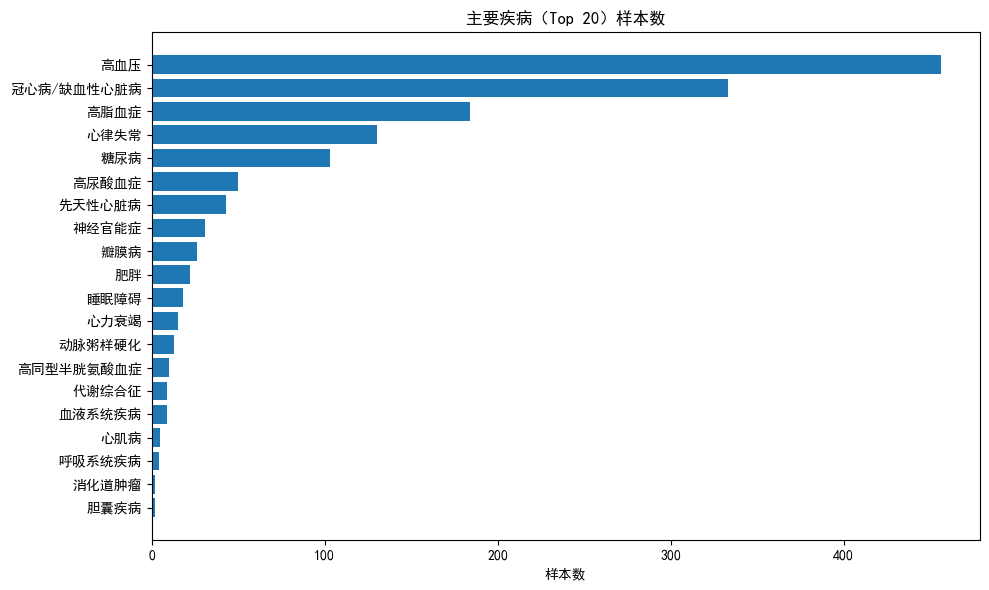

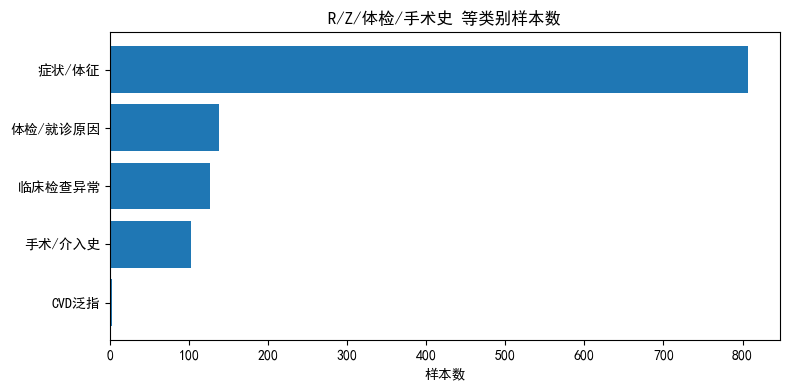

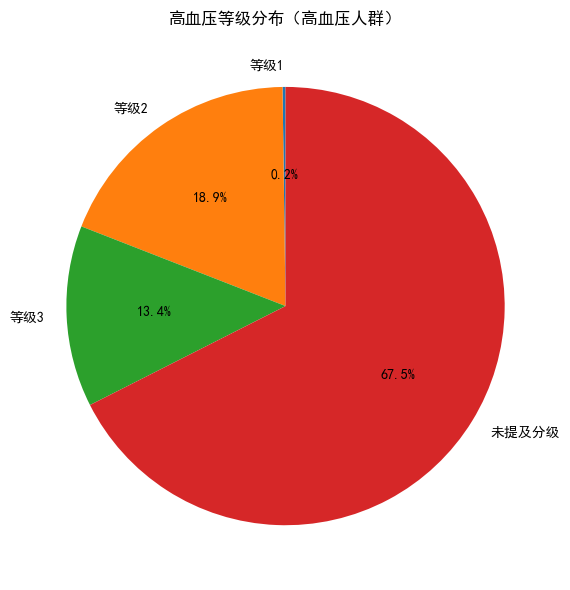

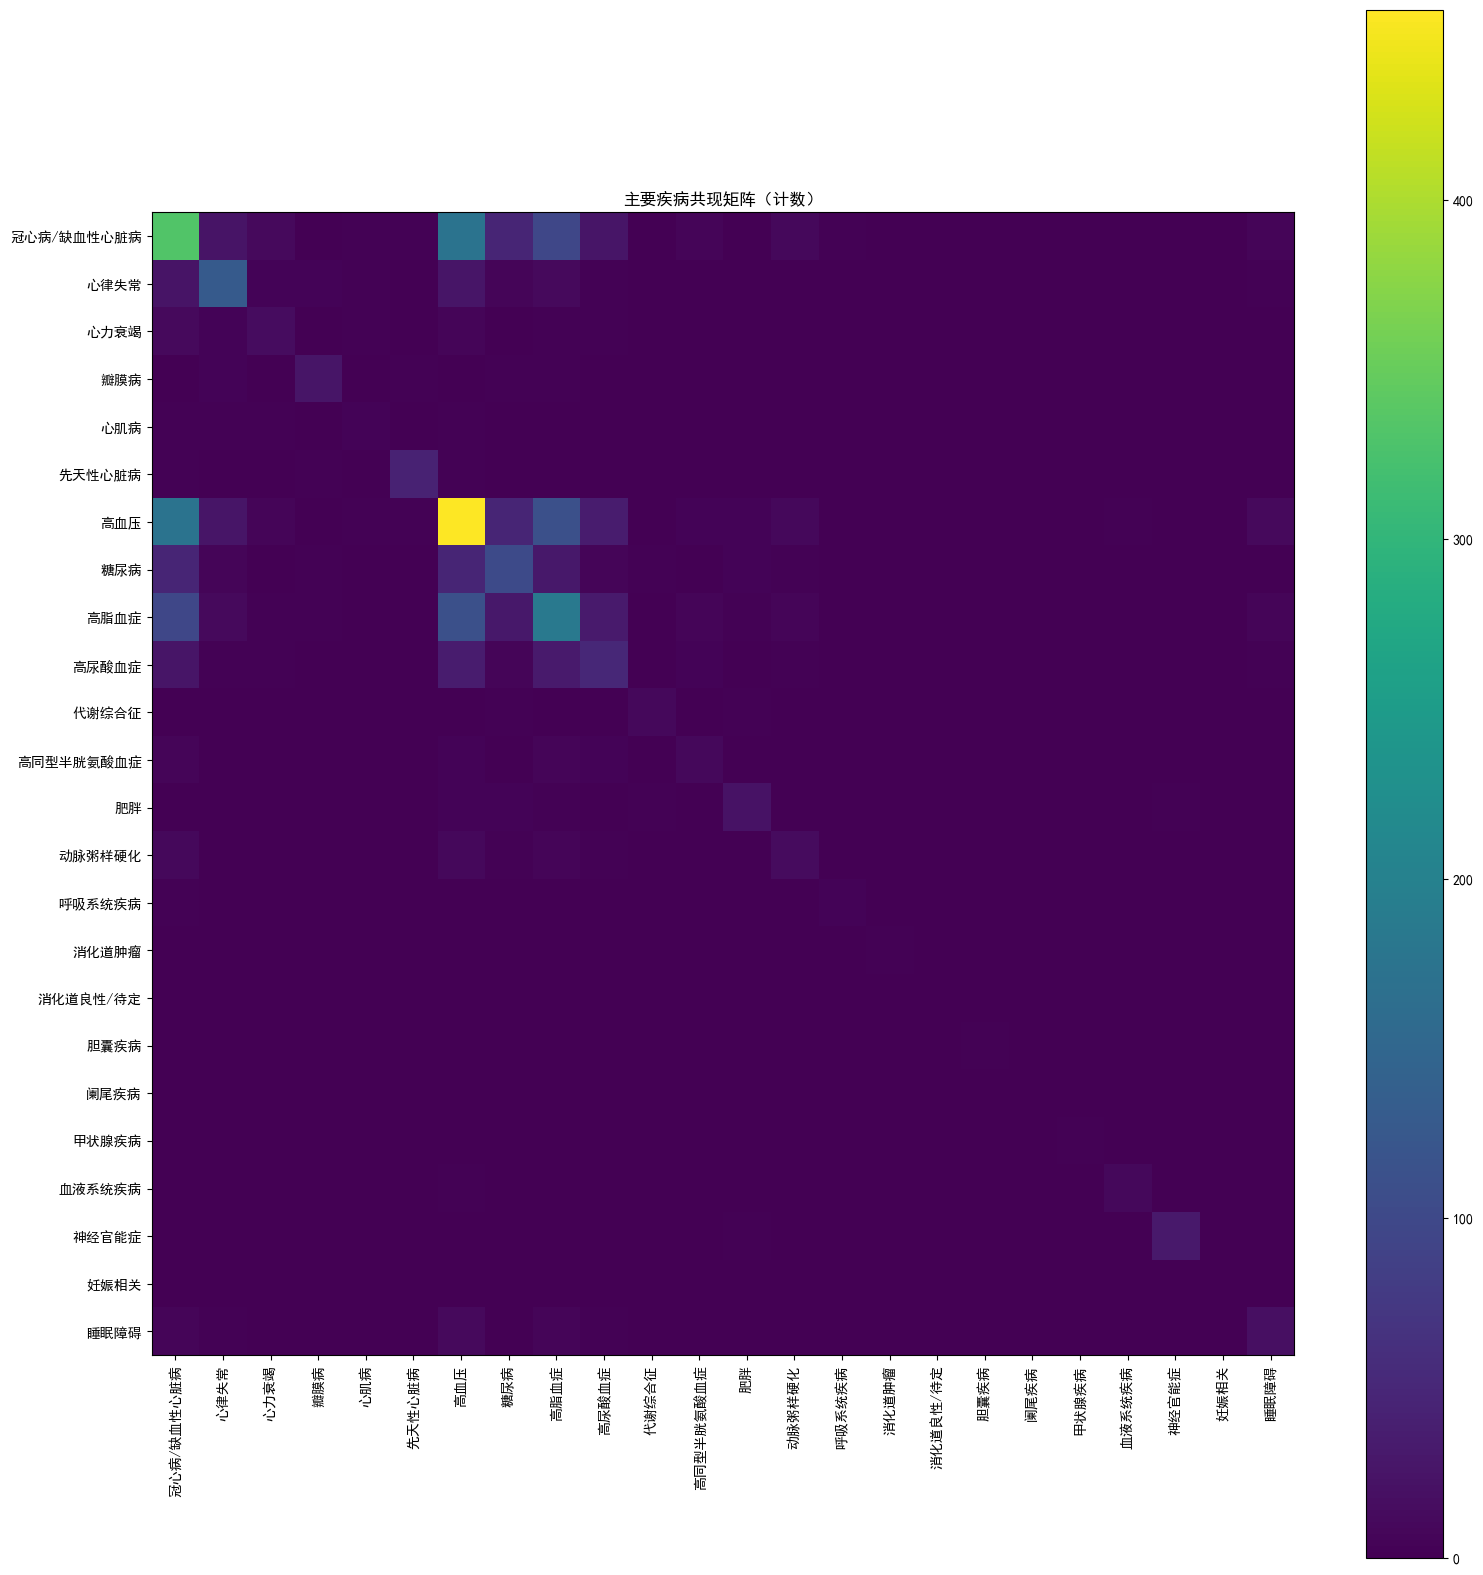

In [160]:
# 基本信息可视化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===================== 0) 图形中文设置（避免乱码 & 负号显示） =====================
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS', 'Heiti TC']  # 任选其一存在即可
plt.rcParams['axes.unicode_minus'] = False

# ===================== 1) 定义列集合（与上一步一致，自动取交集以避免 KeyError） =====================
MAJOR_CATEGORIES = [
    '冠心病/缺血性心脏病','心律失常','心力衰竭','瓣膜病','心肌病','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','代谢综合征','高同型半胱氨酸血症','肥胖','动脉粥样硬化',
    '呼吸系统疾病','消化道肿瘤','消化道良性/待定','胆囊疾病','阑尾疾病','甲状腺疾病','血液系统疾病','神经官能症','妊娠相关','睡眠障碍'
]
RZ_MISC_CATEGORIES = ['症状/体征','临床检查异常','体检/就诊原因','手术/介入史','CVD泛指']

# 只保留当前 df 中存在的列（避免你的数据里缺某些列时报错）
major_cols = [c for c in MAJOR_CATEGORIES if c in df.columns]
rz_cols = [c for c in RZ_MISC_CATEGORIES if c in df.columns]

N = len(df)

# ===================== 2) 主要疾病：样本数 & 占比 =====================
major_counts = df[major_cols].sum(axis=0).astype(int).sort_values(ascending=False)
major_rate = (major_counts / N * 100).round(2)

major_summary = (
    pd.DataFrame({'样本数': major_counts, '占比(%)': major_rate})
      .reset_index()
      .rename(columns={'index': '类别'})
)

# ===================== 3) R/Z/体检/手术史：样本数 & 占比 =====================
rz_counts = df[rz_cols].sum(axis=0).astype(int).sort_values(ascending=False) if rz_cols else pd.Series(dtype=int)
rz_rate = (rz_counts / N * 100).round(2) if len(rz_counts)>0 else pd.Series(dtype=float)

rz_summary = (
    pd.DataFrame({'样本数': rz_counts, '占比(%)': rz_rate})
      .reset_index()
      .rename(columns={'index': '类别'})
      if len(rz_counts)>0 else pd.DataFrame(columns=['类别','样本数','占比(%)'])
)

# ===================== 4) 高血压分级分布（如果存在列） =====================
htn_grade_dist = None
if '高血压等级' in df.columns:
    # 只看非缺失 & 有高血压的人；也可改为全体
    mask_htn = (df.get('高血压', 0) == 1)
    htn_grade_dist = (df.loc[mask_htn, '高血压等级']
                        .value_counts(dropna=False)
                        .sort_index())
    # 统一显示标签
    htn_grade_dist.index = htn_grade_dist.index.map(lambda x: f'等级{int(x)}' if pd.notna(x) else '未提及分级')
    htn_grade_rate = (htn_grade_dist / htn_grade_dist.sum() * 100).round(2)
    htn_summary = pd.DataFrame({'人数': htn_grade_dist, '占比(%)': htn_grade_rate})

# ===================== 5) 缺失/未识别（如果存在列） =====================
missing_unrec = {}
if '诊断缺失' in df.columns:
    missing_unrec['诊断缺失'] = int(df['诊断缺失'].sum())
if '未识别' in df.columns:
    missing_unrec['未识别'] = int(df['未识别'].sum())
missing_unrec_df = pd.DataFrame({'指标': list(missing_unrec.keys()),
                                 '样本数': list(missing_unrec.values())}) if missing_unrec else pd.DataFrame()

# ===================== 6) 共现矩阵（主要疾病类别之间） =====================
# 多标签 0/1 → 共现：X^T X
co_matrix = None
co_pairs_top = None
if len(major_cols) >= 2:
    X = df[major_cols].fillna(0).astype(int).values
    co = X.T @ X   # 方阵，(i,i) = 每类计数；(i,j) = 同时阳性计数
    co_matrix = pd.DataFrame(co, index=major_cols, columns=major_cols)

    # 提取上三角的共现对（不含对角）
    pairs = []
    for i in range(len(major_cols)):
        for j in range(i+1, len(major_cols)):
            pairs.append((major_cols[i], major_cols[j], co[i, j]))
    co_pairs_top = (pd.DataFrame(pairs, columns=['类别A','类别B','共现数'])
                    .sort_values('共现数', ascending=False)
                    .head(20))

# ===================== 7) 打印/展示统计表 =====================
print('【主要疾病】计数与占比（前20）')
print(major_summary.head(20))

if len(rz_summary) > 0:
    print('\n【R/Z/体检/手术史等】计数与占比')
    print(rz_summary)

if htn_grade_dist is not None:
    print('\n【高血压分级（在高血压人群内）】分布')
    print(htn_summary)

if not missing_unrec_df.empty:
    print('\n【缺失/未识别】计数')
    print(missing_unrec_df)

if co_matrix is not None:
    print('\n【主要疾病共现矩阵】(前几行)')
    print(co_matrix.iloc[:10, :10])
    print('\n【共现最多的前20对】')
    print(co_pairs_top)

# ===================== 8) 可视化 =====================
# 8.1 主要疾病条形图（Top 20）
fig1 = plt.figure(figsize=(10, 6))
mshow = major_summary.copy().head(20)
plt.barh(mshow['类别'][::-1], mshow['样本数'][::-1])
plt.xlabel('样本数')
plt.title('主要疾病（Top 20）样本数')
plt.tight_layout()
plt.show()

# 8.2 R/Z/体检/手术史条形图
if len(rz_summary) > 0 and rz_summary['样本数'].sum() > 0:
    fig2 = plt.figure(figsize=(8, 4))
    rshow = rz_summary.copy()
    plt.barh(rshow['类别'][::-1], rshow['样本数'][::-1])
    plt.xlabel('样本数')
    plt.title('R/Z/体检/手术史 等类别样本数')
    plt.tight_layout()
    plt.show()

# 8.3 高血压分级饼图（或条形图）
if htn_grade_dist is not None and htn_grade_dist.sum() > 0:
    fig3 = plt.figure(figsize=(6, 6))
    plt.pie(htn_summary['人数'], labels=htn_summary.index, autopct='%1.1f%%', startangle=90)
    plt.title('高血压等级分布（高血压人群）')
    plt.tight_layout()
    plt.show()

# 8.4 主要疾病共现热图（简单版，不用 seaborn）
if co_matrix is not None:
    fig4 = plt.figure(figsize=(min(1.0*len(major_cols)+2, 16), min(1.0*len(major_cols)+2, 16)))
    plt.imshow(co_matrix, interpolation='nearest')
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(major_cols)), labels=major_cols, rotation=90)
    plt.yticks(ticks=np.arange(len(major_cols)), labels=major_cols)
    plt.title('主要疾病共现矩阵（计数）')
    plt.tight_layout()
    plt.show()


In [184]:
# ================== 疾病 vs 健康 / 缺失 / 健康∪缺失 · acAge/cpAge 优先 · 严格过滤版 ==================
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import mannwhitneyu, rankdata

# -------- 中文/负号 --------
plt.rcParams['font.sans-serif'] = ['SimHei','Microsoft YaHei','Arial Unicode MS','Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# -------- 基本路径与参数 --------
RUN_DIR = globals().get("RUN_DIR", os.path.abspath("."))
ROOT_DIR = os.path.join(RUN_DIR, f"cliffs_groups_{datetime.now().strftime('%Y%m%d-%H%M%S')}")
os.makedirs(ROOT_DIR, exist_ok=True)
print("输出根目录:", ROOT_DIR)

# 1) 指标集合（自动取交集）
TARGETS = ["acAge","cpAge","BMI","卧位心室率","峰值心率","峰值功率","峰值氧脉",
           "VE/VCO2斜率.1","静息血压-收缩压","静息血压-舒张压",
           "FVC","VCmax","FEV1","FEV1/FVC","MVV"]
TARGETS = [c for c in TARGETS if c in df.columns]
if not TARGETS:
    raise RuntimeError("df 中没有任何目标列（acAge/cpAge/BMI/CPET 指标等）。")

# 2) 疾病标签列：优先用 major_cols，否则自动从 0/1 列抽取
if 'major_cols' in globals() and len(major_cols) > 0:
    LABEL_COLS = [c for c in major_cols if c in df.columns]
else:
    LABEL_COLS = [c for c in df.columns
                  if df[c].dropna().isin([0,1]).all()
                  and c not in ["Sex","体检/就诊原因","健康查体","健康体检","健康","体检","诊断缺失","未识别"]]
if not LABEL_COLS:
    raise RuntimeError("未找到疾病标签列（0/1）。请检查 major_cols 或数据。")

# 3) 健康、缺失定义
HEALTH_CAND  = [c for c in ["体检/就诊原因","健康查体","健康体检","健康","体检"] if c in df.columns]
MISSING_CAND = [c for c in ["诊断缺失","未识别"] if c in df.columns]
health_mask  = df[HEALTH_CAND].fillna(0).astype(int).any(axis=1) if HEALTH_CAND else pd.Series(False, index=df.index)
missing_mask = df[MISSING_CAND].fillna(0).astype(int).any(axis=1) if MISSING_CAND else pd.Series(False, index=df.index)

COMPARISONS = {
    "health": health_mask,
    "missing": missing_mask,
    "health_or_missing": (health_mask | missing_mask)
}

# 4) 参数
MIN_CASES = 15           # 阳性/对照样本最小人数
ALPHA = 0.05             # FDR 阈值
STAR_RULES = [(0.001,'***'), (0.01,'**'), (0.05,'*')]
REQUIRE_ALL_METRICS = True   # 严格：所有要画的指标达标才进图（无灰格）

# -------- 统计函数 --------
try:
    from statsmodels.stats.multitest import multipletests
    HAS_SM = True
except Exception:
    HAS_SM = False

def cliffs_delta_from_ranks(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    if len(x)==0 or len(y)==0: return np.nan
    m, n = len(x), len(y)
    ranks = rankdata(np.r_[x,y], method='average')
    r1 = float(np.sum(ranks[:m])); U1 = r1 - m*(m+1)/2.0
    return float(2.0*U1/(m*n) - 1.0)

def mannwhitney_p(x, y):
    x = np.asarray(x, float); x = x[~np.isnan(x)]
    y = np.asarray(y, float); y = y[~np.isnan(y)]
    if len(x)==0 or len(y)==0: return np.nan
    try:
        _, p = mannwhitneyu(x, y, alternative="two-sided", method="asymptotic")
    except TypeError:
        _, p = mannwhitneyu(x, y, alternative="two-sided")
    return float(p)

def fdr_bh(pvals, alpha=ALPHA):
    pvals = np.asarray(pvals, float); mask = ~np.isnan(pvals)
    q = np.full_like(pvals, np.nan, float)
    if mask.sum()==0: return q
    if HAS_SM:
        q[mask] = multipletests(pvals[mask], alpha=alpha, method="fdr_bh")[1]
    else:
        pv = pvals[mask]; m = len(pv)
        order = np.argsort(pv); ranked = pv[order]
        qv = ranked * m / (np.arange(1,m+1))
        qv = np.minimum.accumulate(qv[::-1])[::-1]
        q[mask] = qv[np.argsort(order)]; q[q>1]=1
    return q

def stars(q):
    if np.isnan(q): return ""
    for thr, sym in STAR_RULES:
        if q <= thr: return sym
    return ""

# -------- 列顺序：acAge / cpAge 固定最左，其余保持原 TARGETS 顺序 --------
def order_metrics(metrics_list):
    ordered = []
    for k in ["acAge","cpAge"]:
        if k in metrics_list: ordered.append(k)
    ordered += [m for m in metrics_list if m not in ["acAge","cpAge"]]
    return ordered

# ================= 核心：单比较的计算 + 输出表 + 画星号热图（无数字） =================
def analyze_and_plot(name, ctrl_mask):
    out_dir = os.path.join(ROOT_DIR, name); os.makedirs(out_dir, exist_ok=True)

    # —— 逐指标计算（每个指标单独做 FDR）——
    merged = None
    for tgt in TARGETS:
        rows = []
        for lab in LABEL_COLS:
            pos = (df[lab].astype(float)==1.0)
            # 对照中排除该病阳性者
            ctrl = ctrl_mask & (df[lab].astype(float)!=1.0)
            x = df.loc[pos, tgt].to_numpy(float); x = x[~np.isnan(x)]
            y = df.loc[ctrl, tgt].to_numpy(float); y = y[~np.isnan(y)]
            n1, n0 = len(x), len(y)
            if n1 < MIN_CASES or n0 < MIN_CASES:
                rows.append({"label": lab, f"n_pos_{tgt}": n1, f"n_ctrl_{tgt}": n0,
                             f"delta_{tgt}": np.nan, f"p_{tgt}": np.nan})
            else:
                d = cliffs_delta_from_ranks(x, y)
                p = mannwhitney_p(x, y)
                rows.append({"label": lab, f"n_pos_{tgt}": n1, f"n_ctrl_{tgt}": n0,
                             f"delta_{tgt}": d, f"p_{tgt}": p})
        tbl = pd.DataFrame(rows)
        tbl[f"q_{tgt}"] = fdr_bh(tbl[f"p_{tgt}"].values, alpha=ALPHA)
        merged = tbl if merged is None else merged.merge(tbl, on="label", how="outer")

    # 星号列
    for tgt in TARGETS:
        qcol = f"q_{tgt}"
        if qcol in merged.columns:
            merged[f"stars_{tgt}"] = merged[qcol].apply(stars)

    # —— 严格过滤：所有待画指标均达标（样本数达标且 δ 非 NaN）——
    ok_cols = []
    for tgt in TARGETS:
        cond = (merged[f"n_pos_{tgt}"]>=MIN_CASES) & (merged[f"n_ctrl_{tgt}"]>=MIN_CASES) & (merged[f"delta_{tgt}"].notna())
        merged[f"ok_{tgt}"] = cond
        ok_cols.append(f"ok_{tgt}")
    keep_mask = merged[ok_cols].all(axis=1) if REQUIRE_ALL_METRICS else merged[ok_cols].any(axis=1)

    kept = merged[keep_mask].copy()
    excl = merged[~keep_mask].copy()

    # —— 行排序：按 |δ_acAge|（若无则 |δ_cpAge|）降序 —— 
    row_sort_key = "delta_acAge" if "delta_acAge" in kept.columns else ("delta_cpAge" if "delta_cpAge" in kept.columns else None)
    if row_sort_key:
        kept = kept.sort_values(by=row_sort_key, key=lambda s: s.abs(), ascending=False, na_position="last")

    # —— 列排序：acAge → cpAge → 其它指标（delta/stars/n_pos/n_ctrl 成组）——
    metrics_final = order_metrics([t for t in TARGETS if f"delta_{t}" in kept.columns])
    # 组成最终列顺序（表更易读）
    cols_final = ["label"]
    for t in metrics_final:
        cols_final += [f"n_pos_{t}", f"n_ctrl_{t}", f"delta_{t}", f"p_{t}", f"q_{t}", f"stars_{t}"]
    # 把有的列拉齐顺序（有些目标可能缺 q/p 时自动跳过）
    cols_final = [c for c in cols_final if c in kept.columns]
    kept = kept[cols_final]

    # 四舍五入 delta
    for c in kept.columns:
        if c.startswith("delta_"): kept[c] = kept[c].astype(float).round(4)

    # —— 保存表 —— 
    full_csv = os.path.join(out_dir, f"cliffs_compare_{name}.csv")
    excl_csv = os.path.join(out_dir, f"cliffs_compare_{name}_excluded.csv")
    kept.to_csv(full_csv, index=False, encoding="utf-8-sig")
    excl.to_csv(excl_csv, index=False, encoding="utf-8-sig")
    print("saved ->", full_csv)
    print("saved ->", excl_csv)

    # —— 绘图（只画 kept，颜色=δ，单元格只放星号，无数字）——
    if kept.empty:
        print(f"[WARN] {name}: 过滤后无可画标签。可降低 MIN_CASES。")
        return

    # 组装矩阵
    row_labels = kept["label"].tolist()
    deltas_mat = []
    stars_mat = []
    for t in metrics_final:
        deltas_mat.append(kept[f"delta_{t}"].to_numpy(float))
        stars_mat.append(kept[f"stars_{t}"].astype(str).to_numpy())
    Mdelta = np.vstack(deltas_mat).T   # shape: (n_labels, n_metrics)
    Mstars = np.vstack(stars_mat).T

    # 画热图
    h = max(4.0, min(0.40*len(row_labels)+1.6, 22.0))
    w = max(6.0, 1.2*len(metrics_final)+2.0)
    cmap = plt.get_cmap("coolwarm").copy()

    plt.figure(figsize=(w, h))
    im = plt.imshow(Mdelta, aspect="auto", cmap=cmap, vmin=-1, vmax=1)
    plt.xticks(np.arange(len(metrics_final)), metrics_final, fontsize=11)
    plt.yticks(np.arange(len(row_labels)), row_labels, fontsize=9)
    cbar = plt.colorbar(im, shrink=0.9, pad=0.02)
    cbar.set_label("Cliff's δ（疾病=1 相对 对照）", rotation=90)

    # 星号
    for i in range(Mstars.shape[0]):
        for j in range(Mstars.shape[1]):
            s = Mstars[i, j]
            if s:
                plt.text(j, i, s, ha="center", va="center", fontsize=11, color="k")

    # 网格
    ax = plt.gca()
    ax.set_xticks(np.arange(-.5, len(metrics_final), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(row_labels), 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.4, alpha=0.6)

    title_map = {
        "health": "疾病 vs 健康（严格过滤）",
        "missing": "疾病 vs 诊断缺失（严格过滤）",
        "health_or_missing": "疾病 vs 健康∪缺失（严格过滤）"
    }
    plt.title(title_map.get(name, name), fontsize=13, pad=10)
    plt.tight_layout()
    png = os.path.join(out_dir, "heatmap_stars_noNA.png")
    pdf = os.path.join(out_dir, "heatmap_stars_noNA.pdf")
    plt.savefig(png, dpi=180, bbox_inches="tight")
    plt.savefig(pdf, dpi=300, bbox_inches="tight")
    plt.close()
    print("saved ->", png)
    print("saved ->", pdf)

# ================= 执行三类比较 =================
for nm, msk in COMPARISONS.items():
    analyze_and_plot(nm, msk)

print("\n✅ 完成：三张“严格过滤星号热图”+ 三张“完整表”+ 三张“排除表”。根目录：", ROOT_DIR)


输出根目录: runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\health\cliffs_compare_health.csv
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\health\cliffs_compare_health_excluded.csv
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\health\heatmap_stars_noNA.png
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\health\heatmap_stars_noNA.pdf
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\missing\cliffs_compare_missing.csv
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\missing\cliffs_compare_missing_excluded.csv
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\missing\heatmap_stars_noNA.png
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\missing\heatmap_stars_noNA.pdf
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\health_or_missin

In [186]:
# ================== 量化优势图（显著数目柱状图 + |δ|分布箱线图） ==================
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei','Microsoft YaHei','Arial Unicode MS','Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# 1) 找到最新的 cliffs_groups_* 根目录
BASE = globals().get("RUN_DIR", os.path.abspath("."))
cands = sorted(glob.glob(os.path.join(BASE, "cliffs_groups_*")), key=os.path.getmtime)
if not cands:
    raise FileNotFoundError("未找到 cliffs_groups_* 目录，请先跑上一节脚本。")
ROOT_DIR = cands[-1]
OUT_DIR = os.path.join(ROOT_DIR, f"summary_{datetime.now().strftime('%Y%m%d-%H%M%S')}")
os.makedirs(OUT_DIR, exist_ok=True)
print("汇总输出目录：", OUT_DIR)

# 2) 载入三类比较中的“完整表”（已严格过滤，无灰格）
comp_map = {
    "health": "疾病 vs 健康",
    "missing": "疾病 vs 诊断缺失",
    "health_or_missing": "疾病 vs 健康∪缺失"
}
tables = {}
for key in comp_map:
    fp = os.path.join(ROOT_DIR, key, f"cliffs_compare_{key}.csv")
    if os.path.exists(fp):
        tables[key] = pd.read_csv(fp)
    else:
        print(f"[WARN] 缺少表：{fp}")

if not tables:
    raise RuntimeError("三类比较的完整表均未找到，无法汇总。")

# 3) 解析指标列表（保证 acAge、cpAge 在最前，其余保持文件中的顺序）
def infer_metrics(df):
    ds = [c.replace("delta_","") for c in df.columns if c.startswith("delta_")]
    order = [m for m in ["acAge","cpAge"] if m in ds] + [m for m in ds if m not in ("acAge","cpAge")]
    return order

metrics_all = None
for k, df in tables.items():
    ms = infer_metrics(df)
    metrics_all = ms if metrics_all is None else [m for m in metrics_all if m in ms] + [m for m in ms if m not in (metrics_all or [])]
metrics_all = metrics_all or []

ALPHA = 0.05

# 4) 统计每个比较下，各指标显著标签数量（FDR≤0.05）
rows = []
for comp_key, comp_name in comp_map.items():
    if comp_key not in tables: continue
    df = tables[comp_key]
    for m in metrics_all:
        qcol = f"q_{m}"
        if qcol in df.columns:
            sig_n = int((df[qcol] <= ALPHA).sum())
            rows.append({"comparison": comp_name, "metric": m, "sig_n": sig_n})
sig_df = pd.DataFrame(rows)
if sig_df.empty:
    raise RuntimeError("没有可用的显著性统计。")

# 5) 分组柱状图：显著标签数量
pivot_sig = sig_df.pivot(index="metric", columns="comparison", values="sig_n").fillna(0).loc[metrics_all]
x = np.arange(len(pivot_sig.index))
bw = 0.25
plt.figure(figsize=(max(8, 0.7*len(x)+2), 5.2))
for i, comp_name in enumerate(pivot_sig.columns):
    plt.bar(x + (i-1)*bw, pivot_sig[comp_name].values, width=bw, label=comp_name)
plt.xticks(x, pivot_sig.index, rotation=45, ha="right")
plt.ylabel("显著标签数量（FDR≤0.05）")
plt.title("各指标在不同对照下的显著标签数量")
plt.legend(frameon=True)
plt.tight_layout()
p1 = os.path.join(OUT_DIR, "significant_counts_bar.png")
plt.savefig(p1, dpi=180, bbox_inches="tight"); plt.close()
print("saved ->", p1)

# 6) |δ|分布箱线图（合并三比较中“纳入热图”的标签）
#    注：这里只汇总每个比较表中的 delta_* 列（因为已严格过滤，确保可比）
box_rows = []
for comp_key, comp_name in comp_map.items():
    if comp_key not in tables: continue
    df = tables[comp_key]
    for m in metrics_all:
        dcol = f"delta_{m}"
        if dcol in df.columns:
            vals = df[dcol].dropna().astype(float).abs().values
            for v in vals:
                box_rows.append({"metric": m, "abs_delta": v, "comparison": comp_name})
box_df = pd.DataFrame(box_rows)
if not box_df.empty:
    plt.figure(figsize=(max(8, 0.7*len(metrics_all)+2), 5.6))
    # 箱线图按指标排，合并三比较（不分面，整体看分布）
    data = [box_df.loc[box_df["metric"]==m, "abs_delta"].values for m in metrics_all]
    plt.boxplot(data, labels=metrics_all, showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("|Cliff's δ|")
    plt.title("各指标 |Cliff's δ| 分布（合并三对照，纳入热图的标签）")
    plt.tight_layout()
    p2 = os.path.join(OUT_DIR, "abs_delta_boxplot.png")
    plt.savefig(p2, dpi=180, bbox_inches="tight"); plt.close()
    print("saved ->", p2)
else:
    print("[WARN] 没有可用于箱线图的 |δ| 数据。")

# 7) （可选）导出一份显著性计数表
pivot_sig.to_csv(os.path.join(OUT_DIR, "significant_counts_table.csv"), encoding="utf-8-sig")
print("saved ->", os.path.join(OUT_DIR, "significant_counts_table.csv"))

print("\n✅ 完成：分组柱状图 & |δ|箱线图已输出到：", OUT_DIR)


汇总输出目录： runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\summary_20250820-150414
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\summary_20250820-150414\significant_counts_bar.png
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\summary_20250820-150414\abs_delta_boxplot.png
saved -> runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\summary_20250820-150414\significant_counts_table.csv

✅ 完成：分组柱状图 & |δ|箱线图已输出到： runs_fast_clean\20250819-205255\cliffs_groups_20250820-145304\summary_20250820-150414


In [196]:
CDD3=df.copy()

In [287]:
CDD4=df.copy()

In [317]:
df=CDD1.copy()
df[['acAge','cpAge']]=CDD2[['acAge','cpAge']]

In [313]:
df_clean.tail()

,平均红细胞体积(MCV),酸碱度(PH),单核细胞绝对值[MONO#],淋巴细胞百分率[LYM%],嗜酸粒细胞绝对值[EO#],单核细胞百分率[MONO%],嗜碱粒细胞绝对值[BASO#],比重(SG),尿肌酐,红细胞压积(HCT),促甲状腺素[TSH],尿白蛋白/尿肌酐,钠[Na],肌酐[Cr],血小板容积(PCT),红细胞[RBC],纤维蛋白原[Fib],中性粒细胞绝对值[NEU#],血小板计数[PLT],嗜碱粒细胞百分率[BASO%],氯[Cl],D-二聚体[D-D],淋巴细胞绝对值[LYM#],嗜酸粒细胞百分率[EOS%],N末端前脑钠肽[NT-proBNP],尿酸[UA],直接胆红素[DBIL],胱抑素C[Cys-C],血小板分布宽度(PDW),PT国际标准化比值[INR],脂蛋白a[Lpa],总胆红素[TBIL],平均血小板体积[MPV],葡萄糖(空腹)[GLU],RBC分布宽度SD(RDW-SD),白细胞[WBC],平均血红蛋白浓度(MCHC),载脂蛋白A1[ApoA1],无机磷[P],心型肌酸激酶[CKMB],球蛋白[GLB],高密度脂蛋白胆固醇[HDL-C],低密度脂蛋白胆固醇[LDL-C],肌酸激酶[CK],丙氨酸氨基转移酶[ALT],C-反应蛋白[CRP],中性粒细胞百分率[NEU%],白球蛋白比值[A/G],尿素[UREA],钾[K],尿微量白蛋白,白蛋白[ALB],超敏C反应蛋白[hs-CRP],天门冬氨酸氨基转移酶[AST],碱性磷酸酶[ALP],载脂蛋白B[ApoB],总甲状腺素[TT4],总蛋白[TP],总胆固醇[CHO],乳酸脱氢酶[LDH],游离三碘甲状腺原氨酸[FT3],血红蛋白(HGB),钙[Ca],活化部分凝血活酶时间[APTT],镁[Mg],凝血酶原时间[PT],RBC分布宽度CV(RDW-CV),糖化血红蛋白A1c[HbA1c],血清淀粉样蛋白A,总三碘甲状腺原氨酸[TT3],游离甲状腺素[FT4],高敏肌钙蛋白I[hs TnI],间接胆红素[IBIL],α-羟丁酸脱氢酶[HBDH],平均血红蛋白含量(MCH),甘油三脂[TG]
2565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2568,87.4,NaN,0.55,34.6,0.20,8.9,0.05,NaN,NaN,47.7,NaN,NaN,NaN,60.9,0.22,NaN,NaN,3.22,261.0,0.8,NaN,NaN,2.13,3.3,NaN,331.5,NaN,NaN,8.9,NaN,NaN,11.6,8.5,5.31,41.6,NaN,325.0,NaN,NaN,15,25.5,1.09,1.86,168.0,102,NaN,52.4,1.73,3.21,NaN,NaN,44.2,NaN,NaN,NaN,NaN,NaN,69.7,3.53,196,NaN,155.0,NaN,NaN,NaN,NaN,13.1,NaN,NaN,NaN,NaN,<0.012,NaN,135.0,28.4,0.85
2569,90.5,6.0,0.49,18.0,0.24,7.2,0.09,1.020,NaN,45.6,3.7837,NaN,139.0,137.2,0.31,NaN,NaN,4.80,320.0,1.3,104.0,NaN,1.23,3.5,48.8,653.9,5.5,1.48,11.5,1.03,NaN,20.9,9.8,5.37,39.4,NaN,340.0,NaN,1.04,< 10,32.4,0.83,2.96,95.0,15,21.4,70.0,1.28,4.64,4.6,NaN,41.5,NaN,NaN,72.0,NaN,NaN,73.9,5.06,100,1.930,155.0,NaN,NaN,NaN,NaN,11.9,6.3,NaN,NaN,0.790,<0.012,15.4,69.0,30.8,2.16


In [319]:
# 血液数据清洗
import pandas as pd

# ============ 1) 定义：规范名 -> 同义候选（按优先级从高到低） ============
GROUPS = {
    # ---- 血常规 ----
    "白细胞[WBC]": ["白细胞[WBC]", "白细胞(WBC)", "白细胞[WBCUF]", "白细胞计数[WBC]", "白细胞数", "白细胞"],
    "红细胞[RBC]": ["红细胞[RBC]", "红细胞(RBC)", "红细胞［RBC］", "红细胞计数[RBC]", "●红细胞计数(RBC.)"],
    "血红蛋白(HGB)": ["血红蛋白(HGB)", "血红蛋白浓度[HGB]", "血红蛋白"],
    "红细胞压积(HCT)": ["红细胞压积(HCT)", "红细胞比积[HCT]", "红细胞压积"],
    "平均红细胞体积(MCV)": ["平均红细胞体积(MCV)", "平均红细胞体积[MCV]"],
    "平均血红蛋白含量(MCH)": ["平均血红蛋白含量(MCH)", "平均血红蛋白含量[MCH]"],
    "平均血红蛋白浓度(MCHC)": ["平均血红蛋白浓度(MCHC)", "平均血红蛋白浓度[MCHC]"],
    "血小板计数[PLT]": ["血小板计数[PLT]", "●血小板计数(PLT)"],
    "平均血小板体积(MPV)": ["平均血小板体积(MPV)", "平均血小板体积[MPV]"],
    "血小板分布宽度(PDW)": ["血小板分布宽度(PDW)", "血小板体积分布宽度[PDW]"],
    "血小板容积(PCT)": ["血小板容积(PCT)", "血小板压积[PCT]"],
    "RBC分布宽度CV(RDW-CV)": ["RBC分布宽度CV(RDW-CV)", "RBC分布宽度CV[RDW-CV]"],
    "RBC分布宽度SD(RDW-SD)": ["RBC分布宽度SD(RDW-SD)", "RBC分布宽度SD[RDW-SD]"],

    # 白细胞分类
    "中性粒细胞比率(GRAN%)": ["中性粒细胞比率(GRAN%)", "中性粒细胞百分率[NEU%]", "多个核细胞比率[PMN%]"],
    "中性粒细胞绝对值(GRAN#)": ["中性粒细胞绝对值(GRAN#)", "中性粒细胞绝对值[NEU#]"],
    "淋巴细胞百分比(LYMP%)": ["淋巴细胞百分比(LYMP%)", "淋巴细胞百分率[LYM%]"],
    "淋巴细胞绝对值(LYMP#)": ["淋巴细胞绝对值(LYMP#)", "淋巴细胞绝对值[LYM#]"],
    "单核细胞比率(MON%)": ["单核细胞比率(MON%)", "单核细胞百分率[MONO%]", "单个核细胞比率[MN%]"],
    "单核细胞数(MON#)": ["单核细胞数(MON#)", "单核细胞绝对值[MONO#]"],
    "嗜酸粒比率(EOS%)": ["嗜酸粒比率(EOS%)", "嗜酸性粒细胞百分率[EOS%]"],
    "嗜酸性粒细胞数(EOS#)": ["嗜酸性粒细胞数(EOS#)", "嗜酸粒细胞绝对值[EO#]"],
    "嗜碱粒比率(BASO%)": ["嗜碱粒比率(BASO%)", "嗜碱粒细胞百分率[BASO%]"],
    "嗜碱性粒细胞数(BAS#)": ["嗜碱性粒细胞数(BAS#)", "嗜碱粒细胞绝对值[BASO#]"],
    "幼稚粒细胞(IG%)": ["幼稚粒细胞(IG%)", "幼稚粒细胞百分率[IG%]"],
    "幼稚粒细胞绝对值(IG#)": ["幼稚粒细胞绝对值(IG#)", "幼稚粒细胞绝对值[IG#]"],

    # ---- 生化（肝肾、电解质、代谢）----
    "尿酸[UA]": ["尿酸[UA]", "尿酸(干)[UA]", "尿酸(UA)[干]", "尿酸(干)[UA]", "尿酸(干)[UA]", "尿酸(干)[UA]", "尿酸(干)[UA]"],
    "肌酐[Cr]": ["肌酐[Cr]", "肌酐(Cr)[干]", "肌酐(干)[Cr]", "血肌酐[Cr]"],
    "尿素[Urea]": ["尿素[Urea]", "尿素[UREA]", "尿素(干)[BUN]", "尿素[BUN]", "尿素(干)[UREA]"],
    "丙氨酸氨基转移酶[ALT]": [
        "丙氨酸氨基转移酶[ALT]","丙氨酸氨基转移酶(干)[ALT]","丙氨酸氨基转移酶(ALT)[干]","丙氨酸氨基转移酶(干)","丙氨酸氨基转移酶(干)[ALT]"
    ],
    "天门冬氨酸氨基转移酶[AST]": [
        "天门冬氨酸氨基转移酶[AST]","天门冬氨酸氨基转移酶(干)[AST]","天门冬氨基转肽酶[AST]","天门冬氨基转肽酶(AST)[干]","天门冬氨基转移酶[AST]"
    ],
    "γ-谷氨酰转肽酶[GGT]": [
        "γ-谷氨酰基转移酶[GGT]","γ-谷氨酰基转肽酶[GGT]","γ-谷氨酰基转肽酶(干)[GGT]","γ-谷氨酰基转肽酶[干][GGT]","L-γ-谷氨酰基转移酶[GGT]"
    ],
    "碱性磷酸酶[ALP]": ["碱性磷酸酶[ALP]", "碱性磷酸酶(干)[ALP]", "碱性磷酸酶(ALP)[干]"],
    "总胆红素[TBIL]": ["总胆红素[TBIL]", "总胆红素(干)[TBIL]", "总胆红素测定[TBIL]", "总胆红素(TBIL)[干]"],
    "直接胆红素[DBIL]": ["直接胆红素[DBIL]", "直接胆红素测定[DBIL]"],
    "间接胆红素[IBIL]": ["间接胆红素[IBIL]"],
    "总蛋白[TP]": ["总蛋白[TP]", "总蛋白(TP)[干]", "总蛋白(干)[TP]"],
    "白蛋白[ALB]": ["白蛋白[ALB]", "白蛋白(ALB)[干]", "白蛋白(干)[ALB]"],
    "球蛋白[GLB]": ["球蛋白[GLB]", "球蛋白(GLB)[干]"],
    "白球比[A/G]": ["白球蛋白比值[A/G]", "白球蛋白比例(A/G)[干]", "白球比[A/G]"],
    "葡萄糖[GLU]": [
        "葡萄糖(空腹)[GLU]","葡萄糖[GLU]","空腹血糖(干)[GLU]","快速血糖","急诊随机血糖(GLU)[干]"
    ],
    "甘油三脂[TG]": ["甘油三脂[TG]", "甘油三酯[TG]"],
    "总胆固醇[CHO]": ["总胆固醇[CHO]", "总胆固醇[TC]"],
    "高密度脂蛋白胆固醇[HDL-C]": ["高密度脂蛋白胆固醇[HDL-C]"],
    "低密度脂蛋白胆固醇[LDL-C]": ["低密度脂蛋白胆固醇[LDL-C]"],
    "总胆汁酸[TBA]": ["总胆汁酸[TBA]"],
    "乳酸脱氢酶[LDH]": ["乳酸脱氢酶[LDH]", "乳酸脱氢酶(干)[LDH]"],
    "肌酸激酶[CK]": ["肌酸激酶[CK]", "肌酸激酶(CK)[干]", "肌酸激酶(干)[CK]"],
    "α-羟丁酸脱氢酶[HBDH]": ["α-羟丁酸脱氢酶[HBDH]"],

    # ---- 尿常规（核心两个）----
    "酸碱度(PH)": ["酸碱度(PH)", "PH", "PH值", "PH(酸碱度)", "PH值（PH）"],
    "比重(SG)": ["比重(SG)", "尿比重（SG)"],
}

# ============ 2) 额外直接保留（不做同义合并）的列 ============
EXTRA_KEEP = cpet_vars+basic_vars+['acAge','cpAge','Age']

def simplify_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    核心：对 GROUPS 中每个“规范名”，在候选列表里找你数据中真正存在的那几列，
    选非缺失最多的那个作为代表；重命名为规范名；其余候选全部忽略。
    同时把 EXTRA_KEEP 里存在的列也原样保留。
    """
    chosen = {}
    # 1) 同义合并：逐组挑“非缺失最多”的那个
    for canon, cands in GROUPS.items():
        present = [c for c in cands if c in df.columns]
        if not present:
            continue
        # 选非缺失最多的列
        best = max(present, key=lambda c: df[c].notna().sum())
        chosen[canon] = best

    # 2) 组装数据：把挑中的列取出来，并重命名为规范名
    cols_to_take = list(chosen.values())
    df_pick = df[cols_to_take].copy()
    df_pick = df_pick.rename(columns={v:k for k,v in chosen.items()})

    # 3) 合并“额外直接保留”的列（取交集）
    extra = [c for c in EXTRA_KEEP if c in df.columns and c not in df_pick.columns]
    df_extra = df[extra].copy()

    # 4) 横向合并
    df_slim = pd.concat([df_extra, df_pick], axis=1)

    # 5) 打印对照，方便你核查
    print("=== 合并映射（规范名 <- 原列）===")
    for canon, raw in chosen.items():
        print(f"{canon}  <-  {raw}")
    if extra:
        print("\n=== 直接保留（原名）===")
        print(", ".join(extra))
    print("\n完成：最终保留列数 =", df_slim.shape[1])
    return df_slim

# ====== 使用 ======
df_slim = simplify_columns(df)
df_slim.head()


=== 合并映射（规范名 <- 原列）===
白细胞[WBC]  <-  白细胞计数[WBC]
红细胞[RBC]  <-  ●红细胞计数(RBC.)
血红蛋白(HGB)  <-  血红蛋白(HGB)
红细胞压积(HCT)  <-  红细胞压积(HCT)
平均红细胞体积(MCV)  <-  平均红细胞体积(MCV)
平均血红蛋白含量(MCH)  <-  平均血红蛋白含量(MCH)
平均血红蛋白浓度(MCHC)  <-  平均血红蛋白浓度(MCHC)
血小板计数[PLT]  <-  ●血小板计数(PLT)
平均血小板体积(MPV)  <-  平均血小板体积(MPV)
血小板分布宽度(PDW)  <-  血小板分布宽度(PDW)
血小板容积(PCT)  <-  血小板容积(PCT)
RBC分布宽度CV(RDW-CV)  <-  RBC分布宽度CV(RDW-CV)
RBC分布宽度SD(RDW-SD)  <-  RBC分布宽度SD(RDW-SD)
中性粒细胞比率(GRAN%)  <-  中性粒细胞比率(GRAN%)
中性粒细胞绝对值(GRAN#)  <-  中性粒细胞绝对值(GRAN#)
淋巴细胞百分比(LYMP%)  <-  淋巴细胞百分比(LYMP%)
淋巴细胞绝对值(LYMP#)  <-  淋巴细胞绝对值(LYMP#)
单核细胞比率(MON%)  <-  单核细胞比率(MON%)
单核细胞数(MON#)  <-  单核细胞数(MON#)
嗜酸粒比率(EOS%)  <-  嗜酸粒比率(EOS%)
嗜酸性粒细胞数(EOS#)  <-  嗜酸性粒细胞数(EOS#)
嗜碱粒比率(BASO%)  <-  嗜碱粒比率(BASO%)
嗜碱性粒细胞数(BAS#)  <-  嗜碱性粒细胞数(BAS#)
幼稚粒细胞(IG%)  <-  幼稚粒细胞(IG%)
幼稚粒细胞绝对值(IG#)  <-  幼稚粒细胞绝对值(IG#)
尿酸[UA]  <-  尿酸[UA]
肌酐[Cr]  <-  肌酐[Cr]
尿素[Urea]  <-  尿素[Urea]
丙氨酸氨基转移酶[ALT]  <-  丙氨酸氨基转移酶[ALT]
天门冬氨酸氨基转移酶[AST]  <-  天门冬氨基转肽酶(AST)[干]
γ-谷氨酰转肽酶[GGT]  <-  γ-谷氨酰基转移酶[GGT]
碱性磷酸酶[ALP]  <-  碱性磷酸酶

,卧位心室率,峰值心率,峰值功率,峰值氧脉,VE/VCO2斜率.1,静息血压-收缩压,静息血压-舒张压,FVC,VCmax,FEV1,FEV1/FVC,MVV,运动中最高收缩压,运动终止后3分钟收缩压,运动中最高舒张压,运动终止后3分钟舒张压,运动终止后1分钟心率,运动终止后2分钟心率,运动终止后3分钟心率,峰值氧耗,峰值公斤氧耗,峰值分钟通气量,呼吸商,每分钟通气量(毫升),load-maxload,VO2-AT,VCO2-AT,VCO2-Max.Load,VCO2/kg-AT,VCO2/kg-Max.Load,HR-AT,HR-Max.Load,BPsys-AT,BPsys-Max.Load,BPdia_AT,BPdia-Max.Load,VE-AT,VT-AT,f-ergo-AT,BR-AT,EQO2-Max.Load,EQCO2-Max.Load,PETO2-AT,PETO2-Max.Load,PETCO2-AT,PETCO2-Max.Load,MAX BP*HR,Threshold Power,Sex,Weight,Height,acAge,cpAge,白细胞[WBC],红细胞[RBC],血红蛋白(HGB),红细胞压积(HCT),平均红细胞体积(MCV),平均血红蛋白含量(MCH),平均血红蛋白浓度(MCHC),血小板计数[PLT],平均血小板体积(MPV),血小板分布宽度(PDW),血小板容积(PCT),RBC分布宽度CV(RDW-CV),RBC分布宽度SD(RDW-SD),中性粒细胞比率(GRAN%),中性粒细胞绝对值(GRAN#),淋巴细胞百分比(LYMP%),淋巴细胞绝对值(LYMP#),单核细胞比率(MON%),单核细胞数(MON#),嗜酸粒比率(EOS%),嗜酸性粒细胞数(EOS#),嗜碱粒比率(BASO%),嗜碱性粒细胞数(BAS#),幼稚粒细胞(IG%),幼稚粒细胞绝对值(IG#),尿酸[UA],肌酐[Cr],尿素[Urea],丙氨酸氨基转移酶[ALT],天门冬氨酸氨基转移酶[AST],γ-谷氨酰转肽酶[GGT],碱性磷酸酶[ALP],总胆红素[TBIL],直接胆红素[DBIL],间接胆红素[IBIL],总蛋白[TP],白蛋白[ALB],球蛋白[GLB],白球比[A/G],葡萄糖[GLU],甘油三脂[TG],总胆固醇[CHO],高密度脂蛋白胆固醇[HDL-C],低密度脂蛋白胆固醇[LDL-C],总胆汁酸[TBA],乳酸脱氢酶[LDH],肌酸激酶[CK],α-羟丁酸脱氢酶[HBDH],酸碱度(PH),比重(SG)
0,74,122.0,72.0,6.7,NaN,127.0,67.0,2.18,2.16,2.00,92.0,83.0,171.0,142.0,69.0,64.0,99.0,95.0,90.0,0.82,13.6,22.54,1.00,0.82,72.0,0.61,0.56,0.82,9.3,13.7,103,122.0,158,171.0,69,69.0,15.37,0.71,22.0,82.0,26.0,26.0,104.1,107.3,41.6,42.1,20862,52,女,60.0,154.0,7.524437,60.702030,NaN,4.65,138.0,39.5,90.5,29.7,328.0,231.0,10.8,12.9,0.23,11.5,37.9,67.1,5.34,17.1,1.36,7.0,0.38,2.3,0.17,0.7,0.04,0.2,0.01,240.4,53.4,1.95,24,17.0,NaN,92.0,19.2,4.6,14.6,71.0,43.6,27.4,1.59,8.62,1.27,3.52,1.11,1.79,1.84,208,47.0,168.0,6.0,1.010
1,86,115.0,112.0,10.7,NaN,106.0,75.0,2.92,2.90,2.25,77.0,124.0,156.0,117.0,77.0,61.0,98.0,92.0,86.0,1.23,17.5,47.37,1.12,1.37,112.0,0.82,0.75,1.37,10.7,19.6,98,115.0,118,156.0,70,77.0,24.61,1.2,21.0,80.0,37.0,33.0,106.2,115.2,37.2,37.0,17940,67,男,70.0,161.0,2.091091,58.286888,7.68,5.31,166.0,48.3,90.6,31.3,340.0,181.0,11.2,14.1,0.20,12.9,43.2,66.0,4.54,22.8,1.32,7.5,0.52,1.9,0.07,0.3,0.01,0.3,0.02,366.8,82.4,6.02,25,NaN,NaN,90.0,17.6,2.4,12.1,73.9,42.6,27.9,1.62,6.78,4.20,4.89,0.82,0.80,15.82,NaN,NaN,NaN,6.0,1.038
2,80,135.0,120.0,7.8,29.28,131.0,76.0,4.03,3.96,3.40,84.0,153.0,169.0,133.0,80.0,69.0,117.0,108.0,104.0,1.05,16.7,43.36,1.23,1.29,120.0,0.68,0.68,1.29,10.7,20.5,113,135.0,141,169.0,74,80.0,21.18,0.79,27.0,86.0,39.0,32.0,109.5,119.0,39.6,37.7,22815,86,男,63.0,165.0,3.886967,48.009949,NaN,5.31,154.0,47.3,89.1,29.0,326.0,250.0,9.4,10.0,0.24,12.1,39.7,56.1,3.51,34.9,2.19,4.6,0.29,3.0,0.19,1.4,0.09,0.3,0.02,248.2,60.6,4.26,45,NaN,47.0,NaN,18.6,5.8,12.8,75.3,44.6,30.7,1.45,5.45,1.08,4.29,1.29,2.43,2.69,164,90.0,121.0,6.0,1.015
3,66,115.0,98.0,9.2,23.49,167.0,86.0,2.80,2.78,2.68,96.0,113.0,220.0,174.0,98.0,74.0,100.0,95.0,85.0,1.06,16.3,29.64,1.13,1.20,98.0,0.72,0.64,1.20,9.8,18.4,99,115.0,173,220.0,85,98.0,16.59,1.05,16.0,85.0,27.0,24.0,95.8,108.5,47.3,46.5,25300,63,男,65.0,165.0,9.048218,59.811249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.19,5.11,1.16,3.16,NaN,NaN,NaN,NaN,6.0,1.025
4,69,123.0,152.0,15.1,NaN,138.0,88.0,3.69,3.68,3.36,91.0,182.0,186.0,150.0,107.0,85.0,108.0,90.0,85.0,1.86,21.4,57.04,1.11,2.06,152.0,1.15,1.04,2.06,12,23.7,95,123.0,143,186.0,87,107.0,31.21,1.69,18.0,83.0,30.0,27.0,104.8,111.1,38.9,41.5,22878,95,男,87.0,172.0,-2.483028,49.487282,NaN,5.55,167.0,50.7,91.4,30.2,330.0,141.0,10.2,16.4,0.14,12.8,43.8,59.9,3.25,31.2,1.69,7.2,0.39,1.4,0.08,0.3,0.02,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.01,1.86,5.73,1.09,3.67,NaN,NaN,NaN,NaN,5.5,1.025


In [333]:
# 整理合并血液和年龄数据
df=df_slim.copy()

# 删除 Age 缺失 或 小于10 的行
df = df[~df['Age'].isna() & (df['Age'] >= 10)]

# 删除 Sex 缺失的行
df = df[~df['Sex'].isna()]

# 定义转换函数
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # 如果是一个可迭代的结果（比如 Series），那就取第一个值
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# 统计每列转换失败的数量
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # 跳过 'Sex' 列
        continue
    try:
        original_count = df[col].notna().sum()  # 确保是数字
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # 显式转换为整数
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"处理列 '{col}' 时出错：{e}")

# 输出结果
if failed_counts:
    print("转换失败的列及其数量：")
    for col, count in failed_counts.items():
        print(f"列 '{col}': {count} 个值转换失败")
else:
    print("所有列均成功转换，无失败值。")

# 删除缺失比例80%以上的列，删除所有 Age 为缺失的行
import pandas as pd

# 假设 df 是你的数据集

# 计算每一列的缺失值比例
missing_values_ratio = df.isnull().mean()

# 找出缺失值比例大于80%的列
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# 删除这些列
df = df.drop(columns=columns_to_drop)

# 打印删除的列名
print("删除的列名：")
print(columns_to_drop)
# 删除所有 Age 为缺失的行
initial_row_count = df.shape[0]
df = df.dropna(subset=['Age'])
rows_dropped = initial_row_count - df.shape[0]

# 打印删除的行数
print(f"删除的行数：{rows_dropped}")
# 性别转换
df['Sex'] = df['Sex'].map({'男': 1, '女': 0})
df = df.apply(pd.to_numeric, errors='coerce')
# 手动处理异常格式数据
# 将所有0值、非数值标记为缺失，统一转换为数值型
import pandas as pd
import numpy as np

# 示例数据（你可以用自己的 df = pd.read_csv(...) 替换）
# df = pd.read_csv('你的文件路径.csv')

# 定义转换函数
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # 如果是一个可迭代的结果（比如 Series），那就取第一个值
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# 统计每列转换失败的数量
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # 跳过 'Sex' 列
        continue
    try:
        original_count = df[col].notna().sum()  # 确保是数字
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # 显式转换为整数
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"处理列 '{col}' 时出错：{e}")

# 输出结果
if failed_counts:
    print("转换失败的列及其数量：")
    for col, count in failed_counts.items():
        print(f"列 '{col}': {count} 个值转换失败")
else:
    print("所有列均成功转换，无失败值。")

# 删除缺失比例80%以上的列，删除所有 Age 为缺失的行
import pandas as pd

# 假设 df 是你的数据集

# 计算每一列的缺失值比例
missing_values_ratio = df.isnull().mean()

# 找出缺失值比例大于80%的列
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# 删除这些列
df = df.drop(columns=columns_to_drop)

# 打印删除的列名
print("删除的列名：")
print(columns_to_drop)

转换失败的列及其数量：
列 '卧位心室率': 1 个值转换失败
列 'VE/VCO2斜率.1': 94 个值转换失败
列 '静息血压-收缩压': 57 个值转换失败
列 '静息血压-舒张压': 57 个值转换失败
列 '运动中最高收缩压': 9 个值转换失败
列 '运动中最高舒张压': 9 个值转换失败
列 'BPsys-AT': 15 个值转换失败
列 'BPsys-Max.Load': 9 个值转换失败
列 'BPdia_AT': 15 个值转换失败
列 'BPdia-Max.Load': 9 个值转换失败
列 'MAX BP*HR': 17 个值转换失败
列 'Threshold Power': 8 个值转换失败
列 '嗜酸粒比率(EOS%)': 11 个值转换失败
列 '嗜酸性粒细胞数(EOS#)': 12 个值转换失败
列 '嗜碱粒比率(BASO%)': 17 个值转换失败
列 '嗜碱性粒细胞数(BAS#)': 17 个值转换失败
列 '幼稚粒细胞(IG%)': 24 个值转换失败
列 '幼稚粒细胞绝对值(IG#)': 20 个值转换失败
列 '尿素[Urea]': 2 个值转换失败
列 '丙氨酸氨基转移酶[ALT]': 12 个值转换失败
列 '高密度脂蛋白胆固醇[HDL-C]': 2 个值转换失败
列 '总胆汁酸[TBA]': 1 个值转换失败
列 '乳酸脱氢酶[LDH]': 1 个值转换失败
列 '比重(SG)': 53 个值转换失败
删除的列名：
Index(['白细胞[WBC]', 'γ-谷氨酰转肽酶[GGT]'], dtype='object')
删除的行数：0
所有列均成功转换，无失败值。
删除的列名：
Index([], dtype='object')


In [335]:
# 每列缺失值比例
missing_ratio = df.isna().mean()  # 结果是 0~1 的比例

# 转成百分比
missing_ratio_percent = (df.isna().mean() * 100).round(2)

# 合并成一个 DataFrame，方便查看
missing_df = pd.DataFrame({
    '缺失数量': df.isna().sum(),
    '缺失比例(%)': missing_ratio_percent
})

missing_df

,缺失数量,缺失比例(%)
卧位心室率,43,3.50
峰值心率,6,0.49
峰值功率,6,0.49
峰值氧脉,6,0.49
VE/VCO2斜率.1,168,13.67
静息血压-收缩压,63,5.13
静息血压-舒张压,63,5.13
FVC,9,0.73
VCmax,9,0.73
FEV1,9,0.73


In [337]:
# acAge / cpAge vs 血液指标：样条 + 极端幅度 + ΔR² + 可视化（A/B/C）
# ==============================
import os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
import statsmodels.api as sm
from tqdm import tqdm

# --------- 配置 ---------
PRED_A   = "acAge"    # 左列
PRED_B   = "cpAge"    # 右列
RESP_VARS = blood_vars   # 你给的血液指标清单（很长也没关系）
SPL_DF   = 4          # 样条自由度（3~6 常用；4=默认）
DEGREE   = 3          # 三次样条
TOP_K    = 6          # 选增量最大的若干个指标出图
PERC_A   = (10, 30)   # 用于 PRED_A 的极端幅度 (p10 -> p30)
PERC_B   = (70, 90)   # 用于 PRED_B 的极端幅度 (p70 -> p90)
OUT_DIR  = os.path.join("runs_fast_clean", time.strftime("%Y%m%d-%H%M%S"), "splines_ac_cp")
os.makedirs(OUT_DIR, exist_ok=True)

# 可选：图表美化参数（中文显示）
plt.rcParams["font.sans-serif"] = ["SimHei", "Microsoft YaHei", "Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False


# --------- 工具函数 ---------
def _spline_mat(x, df=SPL_DF, degree=DEGREE, include_intercept=False, varname="x"):
    """构造 B-spline 设计矩阵（patsy.bs），返回 DataFrame。"""
    return dmatrix(
        f"bs({varname}, df={df}, degree={degree}, include_intercept={str(include_intercept)})",
        {varname: x},
        return_type="dataframe"
    )

def fit_spline(y, x):
    """OLS(y ~ bs(x))，返回 model 与用于作图的平滑预测（含 95% CI）。"""
    # 去掉缺失
    mask = (~y.isna()) & (~x.isna())
    y1, x1 = y[mask], x[mask]
    if len(y1) < max(40, SPL_DF + 4):  # 太少不拟合
        return None, None

    Xs = _spline_mat(x1)
    model = sm.OLS(y1.values, Xs.values).fit()

    # 曲线预测
    x_grid = np.linspace(x1.min(), x1.max(), 200)
    Xg = _spline_mat(pd.Series(x_grid, name=x1.name))
    pred = model.get_prediction(Xg.values)
    ci = pred.conf_int(alpha=0.05)
    yhat = pred.predicted_mean

    df_plot = pd.DataFrame({
        "x": x_grid,
        "yhat": yhat,
        "ci_low": ci[:, 0],
        "ci_high": ci[:, 1],
    })
    return model, df_plot

def r2_of_model(y, X):
    """计算线性回归 R²（含常数项）。"""
    mask = (~y.isna()) & (~X.isna().any(axis=1))
    y1, X1 = y[mask], X[mask]
    if len(y1) < max(40, X1.shape[1] + 5):
        return np.nan
    X1c = sm.add_constant(X1.values)
    res = sm.OLS(y1.values, X1c).fit()
    return res.rsquared

def delta_r2_conditional(y, x_add, x_base):
    """ΔR²(add | base)：R²(y ~ bs(base)+bs(add)) - R²(y ~ bs(base))"""
    # 对齐并构造设计矩阵
    mask = (~y.isna()) & (~x_add.isna()) & (~x_base.isna())
    y1, xa1, xb1 = y[mask], x_add[mask], x_base[mask]
    if len(y1) < max(40, 2*SPL_DF + 8):
        return np.nan

    Xb = _spline_mat(xb1).add_prefix("b_")
    Xa = _spline_mat(xa1).add_prefix("a_")
    r2_base = r2_of_model(y1, Xb)
    r2_full = r2_of_model(y1, pd.concat([Xb, Xa], axis=1))
    if np.isnan(r2_base) or np.isnan(r2_full):
        return np.nan
    return max(0.0, r2_full - r2_base)  # 小负数截断为 0

def extreme_change(model, x_series, perc=(10, 30)):
    """|ΔY|：预测在 x 的两个分位点的差的绝对值。"""
    if model is None:
        return np.nan
    p1, p2 = np.nanpercentile(x_series.dropna().values, perc)
    X1 = _spline_mat(pd.Series([p1], name=x_series.name))
    X2 = _spline_mat(pd.Series([p2], name=x_series.name))
    y1 = model.predict(X1.values)[0]
    y2 = model.predict(X2.values)[0]
    return abs(y2 - y1)

def safe_series(d, name):
    return pd.Series(d[name], name=name) if name in d.columns else pd.Series(dtype=float, name=name)


# --------- 主计算：循环所有血液指标 ---------
rows = []
print(">> 逐指标拟合与统计（带进度条）")
for var in tqdm(RESP_VARS):
    if var not in df.columns:
        continue
    y = safe_series(df, var)
    xA = safe_series(df, PRED_A)
    xB = safe_series(df, PRED_B)
    # 拟合 y ~ s(acAge) 与 y ~ s(cpAge)
    mdlA, plotA = fit_spline(y, xA)
    mdlB, plotB = fit_spline(y, xB)

    # 极端幅度
    dyA = extreme_change(mdlA, xA, perc=PERC_A)
    dyB = extreme_change(mdlB, xB, perc=PERC_B)

    # 条件增量 ΔR²
    dR2_A_on_B = delta_r2_conditional(y, x_add=xA, x_base=xB)
    dR2_B_on_A = delta_r2_conditional(y, x_add=xB, x_base=xA)

    rows.append({
        "variable": var,
        "abs_dy_acAge": dyA,
        "abs_dy_cpAge": dyB,
        "dR2_acAge|cpAge": dR2_A_on_B,
        "dR2_cpAge|acAge": dR2_B_on_A,
        "_plotA": plotA,   # 暂存作图数据
        "_plotB": plotB,
    })

res = pd.DataFrame(rows)

# 过滤全空 & 选 top-k（按两种 ΔR² 的最大值排序）
res["dR2_max"] = res[["dR2_acAge|cpAge", "dR2_cpAge|acAge"]].max(axis=1)
res = res.dropna(subset=["dR2_max"])
res_sorted = res.sort_values("dR2_max", ascending=False).reset_index(drop=True)

top_vars = res_sorted["variable"].head(TOP_K).tolist()
res_top = res_sorted[res_sorted["variable"].isin(top_vars)].copy()

# 保存结果表
csv_path = os.path.join(OUT_DIR, "spline_summary.csv")
res_sorted.drop(columns=["_plotA","_plotB"]).to_csv(csv_path, index=False, encoding="utf-8-sig")
print("结果表已保存：", csv_path)


# --------- 图 A：样条小面板（左 acAge，右 cpAge）---------
def panel_A(res_top, predA=PRED_A, predB=PRED_B, out_path=None):
    n = len(res_top)
    if n == 0:
        return
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(8, 2.2*n), sharex=False)
    if n == 1:
        axes = np.array([axes])
    for i, (_, r) in enumerate(res_top.iterrows()):
        var = r["variable"]
        # A 列
        ax = axes[i, 0]
        plotA = r["_plotA"]
        if plotA is not None and not plotA.empty:
            ax.fill_between(plotA["x"], plotA["ci_low"], plotA["ci_high"], alpha=0.25)
            ax.plot(plotA["x"], plotA["yhat"], lw=2)
        ax.set_ylabel(var)
        ax.set_xlabel(predA)
        # B 列
        ax = axes[i, 1]
        plotB = r["_plotB"]
        if plotB is not None and not plotB.empty:
            ax.fill_between(plotB["x"], plotB["ci_low"], plotB["ci_high"], alpha=0.25, color="#d62728", edgecolor=None)
            ax.plot(plotB["x"], plotB["yhat"], lw=2, color="#d62728")
        ax.set_xlabel(predB)
    fig.suptitle("A  样条拟合：预测年龄指标 vs 血液指标（上：acAge；右：cpAge）", y=0.995)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    if out_path:
        fig.savefig(out_path, dpi=160)
        plt.close(fig)
    else:
        plt.show()

png_A = os.path.join(OUT_DIR, "panel_A_splines.png")
panel_A(res_top, out_path=png_A)
print("图 A 保存：", png_A)


# --------- 图 B：极端幅度森林图（|ΔY|）---------
def panel_B(res_top, out_path=None):
    dfp = res_top.copy()
    dfp = dfp.sort_values("abs_dy_acAge", ascending=True)
    y = np.arange(len(dfp))
    fig = plt.figure(figsize=(8, 0.6*len(dfp) + 2))
    ax = plt.gca()
    # 左：acAge（蓝）
    ax.hlines(y, 0, dfp["abs_dy_acAge"], color="#1f77b4", lw=3, label=f"{PRED_A} ({PERC_A[0]}→{PERC_A[1]}p)")
    ax.plot(dfp["abs_dy_acAge"], y, "o", color="#1f77b4")
    # 右：cpAge（红）
    ax.hlines(y, 0, dfp["abs_dy_cpAge"], color="#d62728", lw=3, label=f"{PRED_B} ({PERC_B[0]}→{PERC_B[1]}p)")
    ax.plot(dfp["abs_dy_cpAge"], y, "o", color="#d62728")
    ax.set_yticks(y)
    ax.set_yticklabels(dfp["variable"])
    ax.set_xlabel("Absolute ΔY (per extreme change)")
    ax.set_title("B  极端变化幅度（|ΔY|）森林图")
    ax.legend(loc="lower right")
    plt.tight_layout()
    if out_path:
        plt.savefig(out_path, dpi=160)
        plt.close()
    else:
        plt.show()

png_B = os.path.join(OUT_DIR, "panel_B_abs_change.png")
panel_B(res_top, out_path=png_B)
print("图 B 保存：", png_B)


# --------- 图 C：增量解释度森林图（ΔR²）---------
def panel_C(res_top, out_path=None):
    dfp = res_top.copy()
    # 两列并排，左：dR2_acAge|cpAge；右：dR2_cpAge|acAge
    # 按 acAge 的 ΔR² 排序（也可以换成两者 max 排序）
    dfp = dfp.sort_values("dR2_acAge|cpAge", ascending=True)
    y = np.arange(len(dfp))
    fig = plt.figure(figsize=(8, 0.6*len(dfp) + 2))
    ax = plt.gca()
    ax.hlines(y, 0, dfp["dR2_acAge|cpAge"]*100, color="#1f77b4", lw=3, label=f"{PRED_A} | {PRED_B}")
    ax.plot(dfp["dR2_acAge|cpAge"]*100, y, "o", color="#1f77b4")
    ax.hlines(y, 0, dfp["dR2_cpAge|acAge"]*100, color="#d62728", lw=3, label=f"{PRED_B} | {PRED_A}")
    ax.plot(dfp["dR2_cpAge|acAge"]*100, y, "o", color="#d62728")
    ax.set_yticks(y)
    ax.set_yticklabels(dfp["variable"])
    ax.set_xlabel("Incremental R² (%)")
    ax.set_title("C  增量解释度（ΔR²）森林图")
    ax.legend(loc="lower right")
    plt.tight_layout()
    if out_path:
        plt.savefig(out_path, dpi=160)
        plt.close()
    else:
        plt.show()

png_C = os.path.join(OUT_DIR, "panel_C_deltaR2.png")
panel_C(res_top, out_path=png_C)
print("图 C 保存：", png_C)


# --------- 清理中间列（防止后续误用）---------
# 从 res 中去掉 _plotA/_plotB 再保存一份“干净结果表”
clean_tbl = res_sorted.drop(columns=["_plotA","_plotB"])
clean_csv = os.path.join(OUT_DIR, "spline_summary_clean.csv")
clean_tbl.to_csv(clean_csv, index=False, encoding="utf-8-sig")
print("整表（干净版）保存：", clean_csv)

print("\n完成 ✅  输出目录：", OUT_DIR)


>> 逐指标拟合与统计（带进度条）


100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [00:05<00:00, 14.11it/s]


结果表已保存： runs_fast_clean\20250820-203227\splines_ac_cp\spline_summary.csv
图 A 保存： runs_fast_clean\20250820-203227\splines_ac_cp\panel_A_splines.png
图 B 保存： runs_fast_clean\20250820-203227\splines_ac_cp\panel_B_abs_change.png
图 C 保存： runs_fast_clean\20250820-203227\splines_ac_cp\panel_C_deltaR2.png
整表（干净版）保存： runs_fast_clean\20250820-203227\splines_ac_cp\spline_summary_clean.csv

完成 ✅  输出目录： runs_fast_clean\20250820-203227\splines_ac_cp


In [339]:
print(df[[PRED_A, PRED_B]].apply(pd.to_numeric, errors="coerce").describe(
    percentiles=[.1,.3,.7,.9]
))


             acAge        cpAge
count  1229.000000  1229.000000
mean     -0.413101    43.738859
std       6.811135    10.932569
min     -23.233540    16.060658
10%      -8.798727    30.341350
30%      -3.953529    36.818805
50%      -0.555656    42.894558
70%       3.013139    49.021107
90%       8.181678    58.771172
max      32.125904    78.990479
